In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential,load_model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

from tensorflow import keras
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Conv1D
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
output_folder = "CNN_Model_Output"
file = "Combined_Viral_Data.csv"

# Load the data
data = pd.read_csv(file)

# Shuffle the combined data
shuffled_data = data.sample(frac=1).reset_index(drop=True)

# Prepare data for training
X = np.array(shuffled_data['DNA'])
y = np.array(shuffled_data['Label'])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def pad_sequences(sequences, max_length):
    padded_sequences = []
    for sequence in sequences:
        if len(sequence) < max_length:
            padded_sequence = sequence + 'N' * (max_length - len(sequence))
        else:
            padded_sequence = sequence[:max_length]
        padded_sequences.append(padded_sequence)
    return padded_sequences

max_length = 11195

X_train_padded = pad_sequences(X_train, max_length)
X_test_padded = pad_sequences(X_test, max_length)


In [3]:
len(X_train)

11760

In [4]:
len(X_test)

2940

In [5]:
# One-hot encoding for DNA sequences
def one_hot_encoding(seq):
    base_dict = {'A': [1, 0, 0, 0], 'T': [0, 1, 0, 0], 'C': [0, 0, 1, 0], 'G': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    return np.array([base_dict.get(base, [0, 0, 0, 0]) for base in seq])

X_train_encoded = np.array([one_hot_encoding(seq) for seq in X_train_padded])
X_test_encoded = np.array([one_hot_encoding(seq) for seq in X_test_padded])


In [6]:
# Define the CNN model
model = Sequential()

# Convolutional layer with 7 filters, kernel size of 21, and ReLU activation function
model.add(Conv1D(4, 21, activation='relu', input_shape=(11195,4)))

# Max pooling layer with pool size of 1000
model.add(MaxPooling1D(500))

# Flatten layer to convert features into a one-dimensional array
model.add(Flatten())

# Output layer with 4 neurons (for 4 classes) and softmax activation function for classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\uppug\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
model.fit(X_train_encoded, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.7745 - loss: 0.6590 - val_accuracy: 0.9911 - val_loss: 0.0564
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.9930 - loss: 0.0427 - val_accuracy: 0.9915 - val_loss: 0.0380
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.9929 - loss: 0.0298 - val_accuracy: 0.9915 - val_loss: 0.0281
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9915 - val_loss: 0.0207
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.9974 - val_loss: 0.0167
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.9972 - loss: 0.0132 - val_accuracy: 0.9983 - val_loss: 0.0129
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.9973 - loss: 0.0119 - val_accuracy: 0.9983 - val_loss: 0.0096
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.9984 - loss: 0.0075 - 

In [25]:
model.save("4viruses_model.h5")

368/368 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9989 - loss: 0.0040
Test Loss: 0.004960431717336178
Test Accuracy: 0.9985544085502625
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


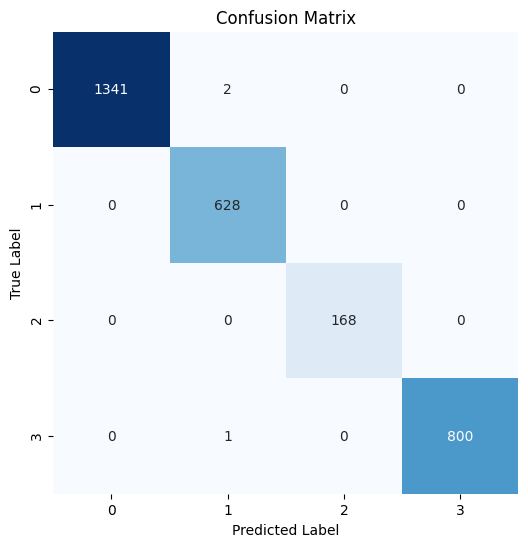

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

evaluation = model.evaluate(X_train_encoded, y_train)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Assuming y_test and y_pred are already defined
y_pred = np.argmax(model.predict(X_test_encoded), axis=-1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


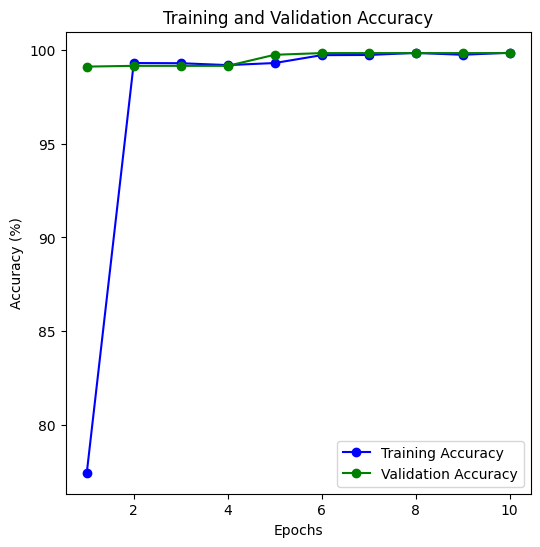

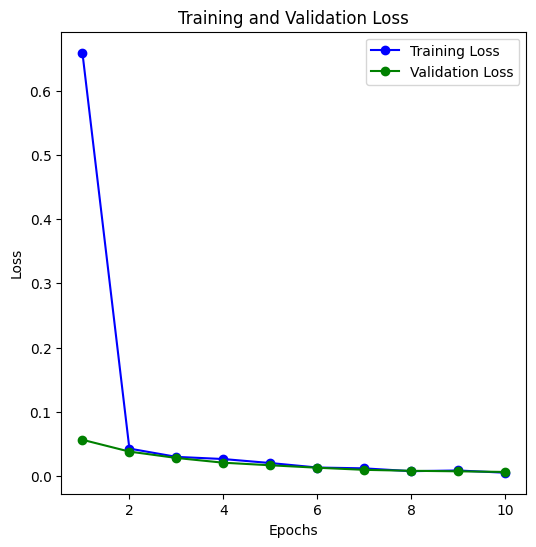

In [37]:
import matplotlib.pyplot as plt

# Data for epochs, accuracy, and loss
epochs = list(range(1, 11))
training_accuracy = [77.45, 99.30, 99.29, 99.19, 99.30, 99.72, 99.73, 99.84, 99.74, 99.85]
validation_accuracy = [99.11, 99.15, 99.15, 99.15, 99.74, 99.83, 99.83, 99.83, 99.83, 99.83]
training_loss = [0.6590, 0.0427, 0.0298, 0.0264, 0.0202, 0.0132, 0.0119, 0.0075, 0.0086, 0.0051]
validation_loss = [0.0564, 0.0380, 0.0281, 0.0207, 0.0167, 0.0129, 0.0096, 0.0081, 0.0073, 0.0063]

# Plot Training and Validation Accuracy
plt.figure(figsize=(6, 6))

plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'go-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'go-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [4]:
model = load_model("final_model.h5")

C:\Users\uppug\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11175, 4)            │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 22, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             356 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,090 (8.17 KB)

 Trainable params: 696 (2.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,394 (5.45 KB)

In [35]:
# Define a function to extract feature maps
def get_feature_maps(model, layer_name, input_data):
    # Create a model that outputs the activations of the desired layer
    activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    # Reshape the input data to match the expected shape
    input_data = np.expand_dims(input_data, axis=0)  # Add a batch dimension
    # Get the activations for the input data
    activations = activation_model.predict(input_data)
    return activations

# Define a dictionary to map folder names to disease names and labels
disease_mapping = {
    "HBV": {"disease": "HBV", "label": 0},
    "INFLUENZA": {"disease": "Influenza", "label": 1},
    "HCV": {"disease": "HCV", "label": 2},
    "DENGUE": {"disease": "Dengue", "label": 3},
    "HIV": {"disease": "HIV", "label": 4},
    "ROTA": {"disease": "Rota", "label": 5},
    "EBOLA": {"disease": "Ebola", "label": 6}
}

# Define the layer name for which you want to extract feature maps
layer_name = 'max_pooling1d'

# Define the number of samples to visualize per class
num_samples_per_class = 2

# Create a dictionary to store sample indices for each class
class_samples = {}

# Find indices of samples for each class
for i, label in enumerate(y_test):
    if label not in class_samples:
        class_samples[label] = [i]
    else:
        class_samples[label].append(i)

# Loop through samples for each class
for label, indices in class_samples.items():
    disease_info = next((key for key, value in disease_mapping.items() if value["label"] == label), None)
    disease_name = disease_mapping[disease_info]['disease']
    print(f"Disease: {disease_name}")
    for i in range(min(num_samples_per_class, len(indices))):
        # Get the feature maps for the i-th sample of the current class
        test_sample = X_test_encoded[indices[i]]
        test_feature_maps = get_feature_maps(model, layer_name, test_sample)
        
        # Visualize the feature maps
        plt.figure(figsize=(15, 5))
        for j in range(test_feature_maps.shape[-1]):
            plt.subplot(1, test_feature_maps.shape[-1], j + 1)
            plt.imshow(test_feature_maps[:, :, j], cmap="hot" )
            plt.axis('off')
        plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11175, 4)            │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 22, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             356 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,090 (8.17 KB)

 Trainable params: 696 (2.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,394 (5.45 KB)

Disease: Dengue
Error while processing sample index 0: The layer sequential has never been called and thus has no defined input.
Error while processing sample index 4: The layer sequential has never been called and thus has no defined input.
Disease: Influenza
Error while processing sample index 1: The layer sequential has never been called and thus has no defined input.
Error while processing sample index 3: The layer sequential has never been called and thus has no defined input.
Disease: HBV
Error while processing sample index 2: The layer sequential has never been called and thus has no defined input.
Error while processing sample index 5: The layer sequential has never been called and thus has no defined input.
Disease: HCV
Error while processing sample index 7: The layer sequential has never been called and thus has no defined input.
Error while processing sample index 44: The layer sequential has never been called and thus has no defined input.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, UpSampling1D

# Define a function to extract and unpool feature maps
def get_unpooled_feature_maps(model, pooling_layer_name, input_data, unpool_size):
    # Create a model that outputs the activations of the desired pooling layer
    activation_model = Model(inputs=model.input, outputs=model.get_layer(pooling_layer_name).output)
    # Reshape the input data to match the expected shape
    input_data = np.expand_dims(input_data, axis=0)  # Add a batch dimension
    # Get the activations for the input data
    pooled_activations = activation_model.predict(input_data)
    
    # Perform unpooling
    upsampling_layer = UpSampling1D(size=unpool_size)
    unpooled_activations = upsampling_layer(pooled_activations)
    
    return unpooled_activations.numpy()

# Define a dictionary to map folder names to disease names and labels
disease_mapping = {
    "HBV": {"disease": "HBV", "label": 0},
    "INFLUENZA": {"disease": "Influenza", "label": 1},
    "HCV": {"disease": "HCV", "label": 2},
    "DENGUE": {"disease": "Dengue", "label": 3},
    "HIV": {"disease": "HIV", "label": 4},
    "ROTA": {"disease": "Rota", "label": 5},
    "EBOLA": {"disease": "Ebola", "label": 6}
}

# Define the layer name for which you want to extract and unpool feature maps
pooling_layer_name = 'max_pooling1d'
unpool_size = 500  # Define the upsampling factor based on the pooling operation used

# Define the number of samples to visualize per class
num_samples_per_class = 2

# Create a dictionary to store sample indices for each class
class_samples = {}

# Find indices of samples for each class
for i, label in enumerate(y_test):
    if label not in class_samples:
        class_samples[label] = [i]
    else:
        class_samples[label].append(i)

# Loop through samples for each class
for label, indices in class_samples.items():
    disease_info = next((key for key, value in disease_mapping.items() if value["label"] == label), None)
    disease_name = disease_mapping[disease_info]['disease']
    print(f"Disease: {disease_name}")
    for i in range(min(num_samples_per_class, len(indices))):
        # Get the unpooled feature maps for the i-th sample of the current class
        test_sample = X_test_encoded[indices[i]]
        unpooled_feature_maps = get_unpooled_feature_maps(model, pooling_layer_name, test_sample, unpool_size)
        
        # Visualize the unpooled feature maps using line plots
        plt.figure(figsize=(15, 5))
        for j in range(unpooled_feature_maps.shape[-1]):
            plt.plot(unpooled_feature_maps[0, :, j], label=f'Feature map {j+1}')
        plt.legend()
        plt.title(f'{disease_name} - Sample {i+1}')
        plt.xlabel('Sequence Length')
        plt.ylabel('Activation')
        plt.show()


Disease: Dengue


ValueError: The layer sequential has never been called and thus has no defined input.

1/1 [==============================] - 0s 80ms/step


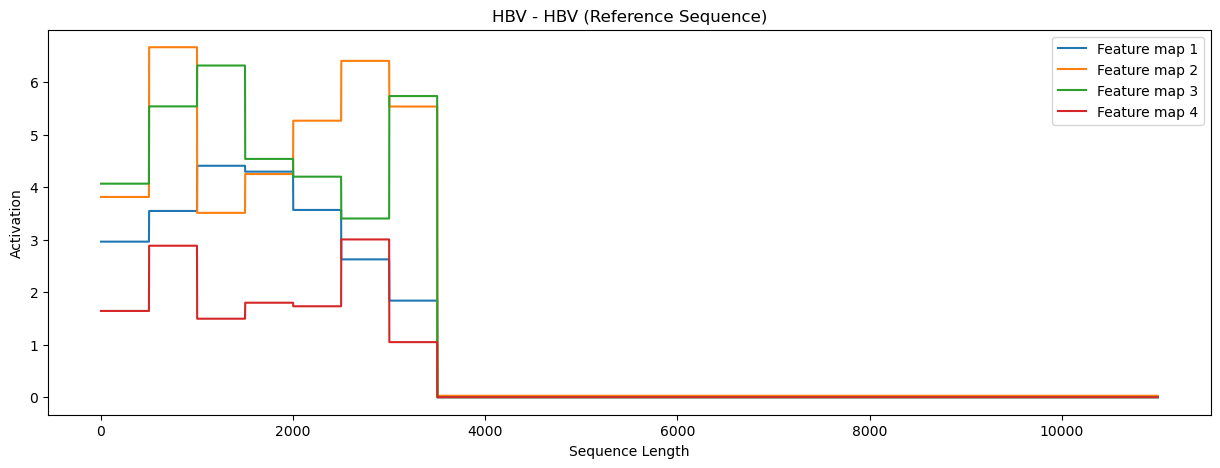

1/1 [==============================] - 0s 91ms/step


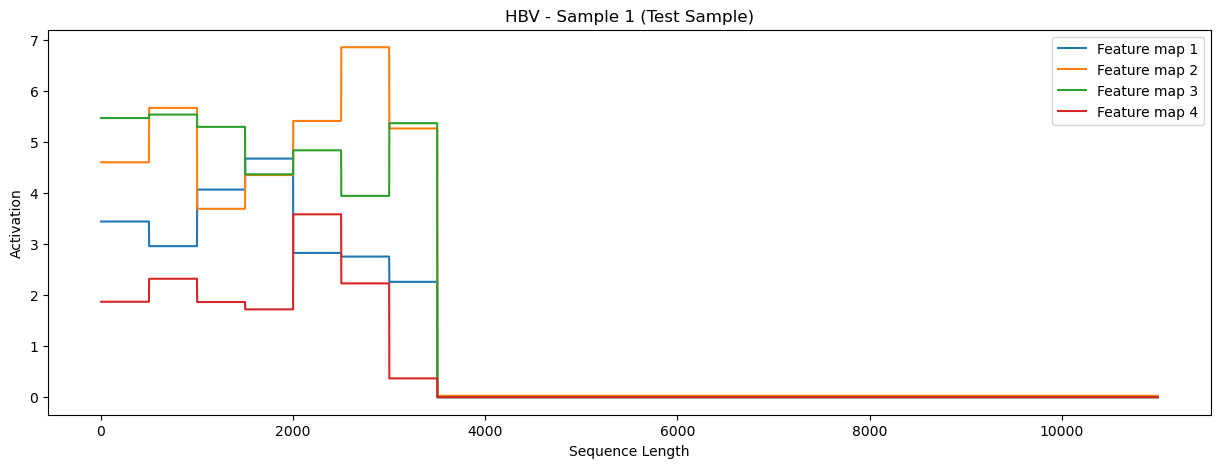

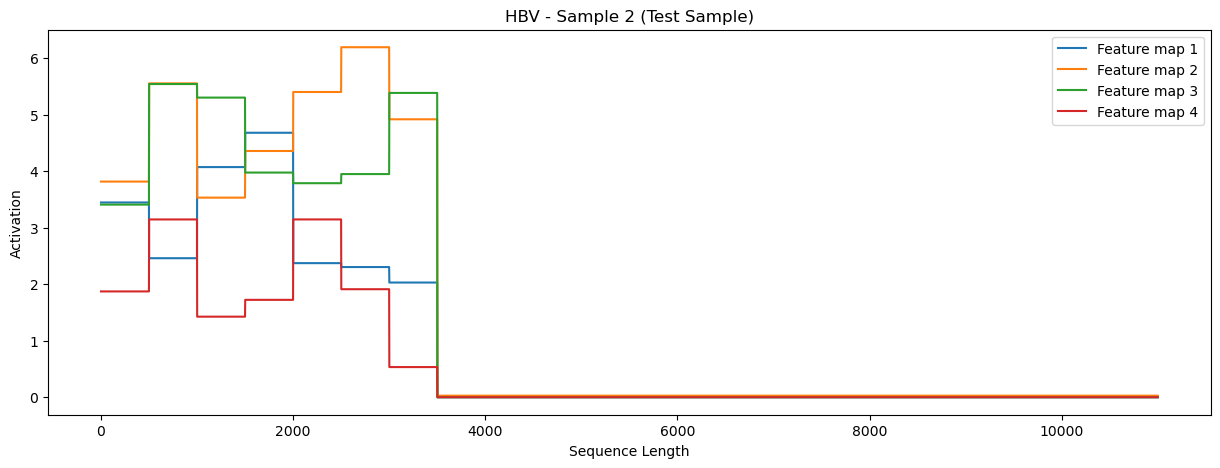

1/1 [==============================] - 0s 57ms/step


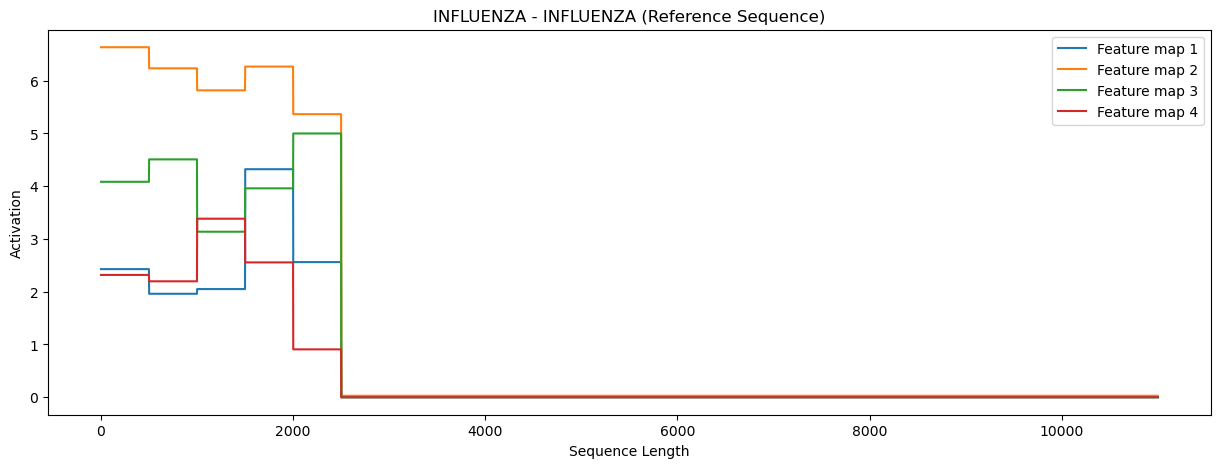

1/1 [==============================] - 0s 66ms/step


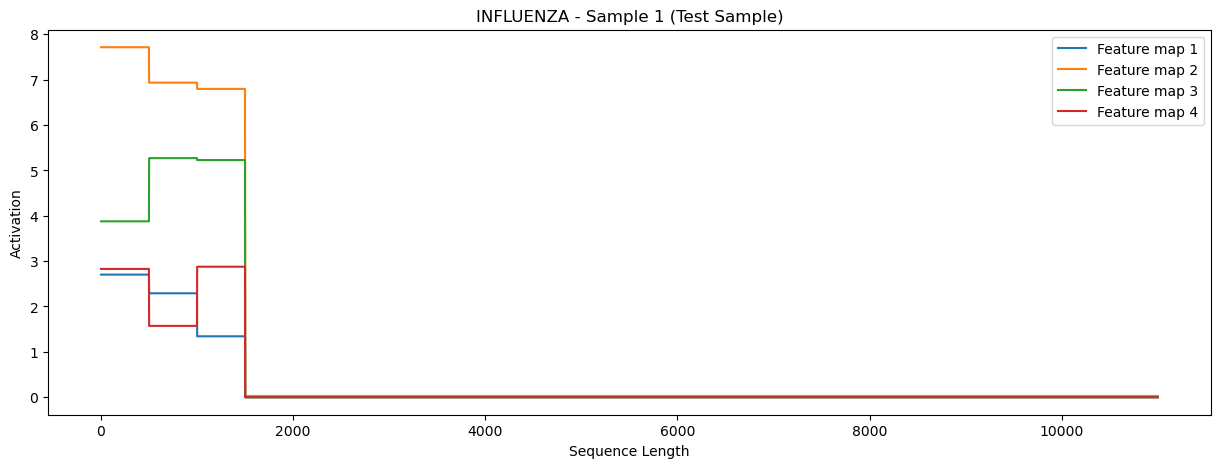

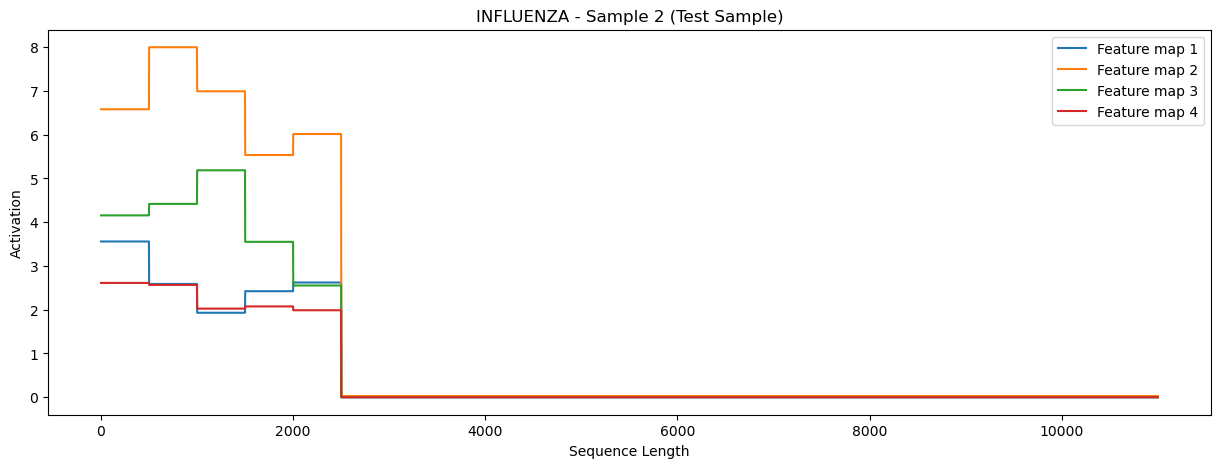

1/1 [==============================] - 0s 80ms/step


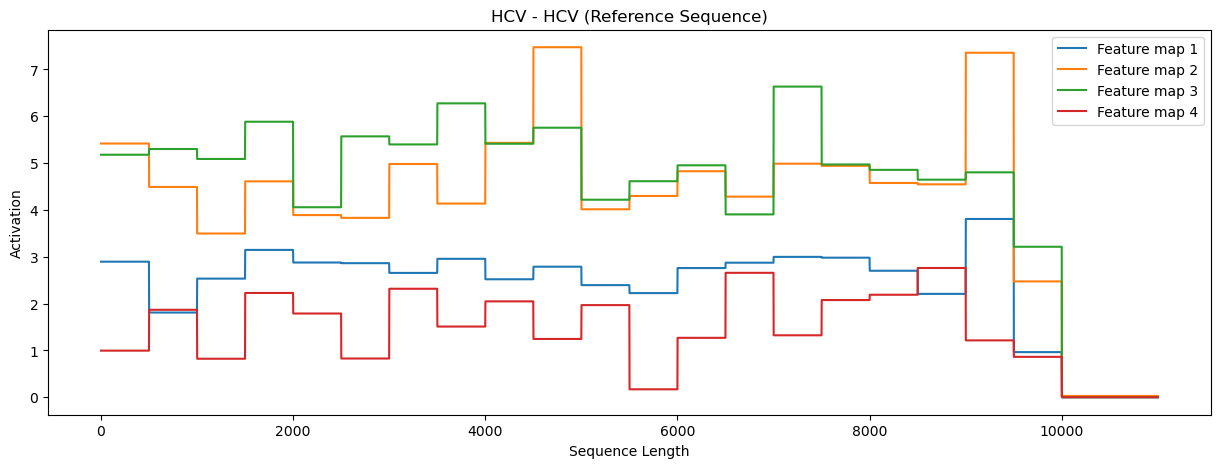

1/1 [==============================] - 0s 99ms/step


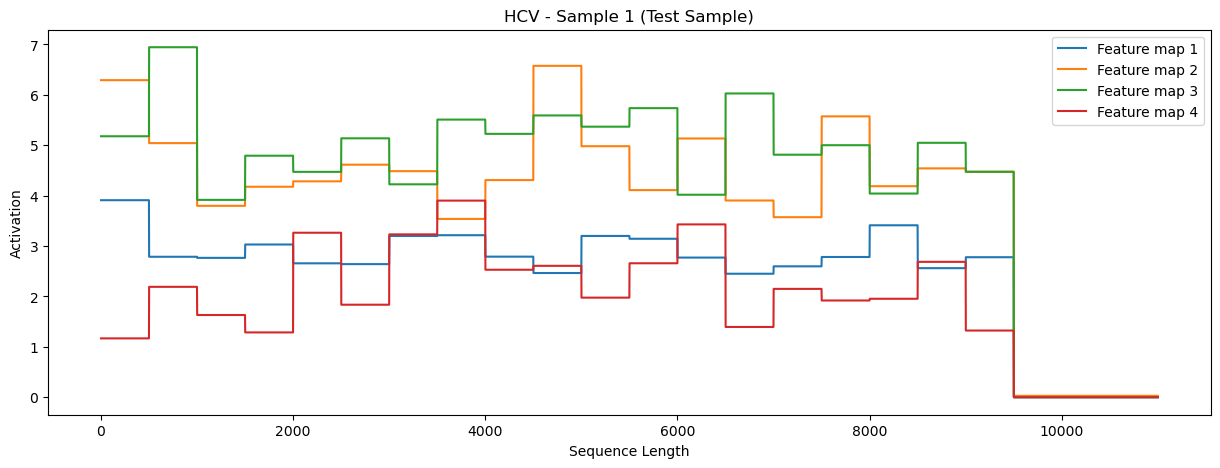

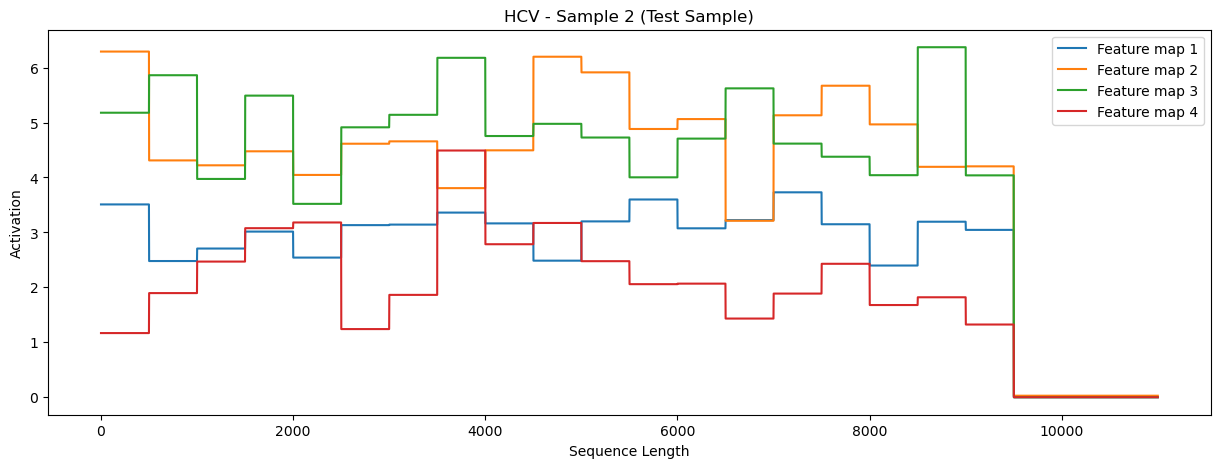

1/1 [==============================] - 0s 89ms/step


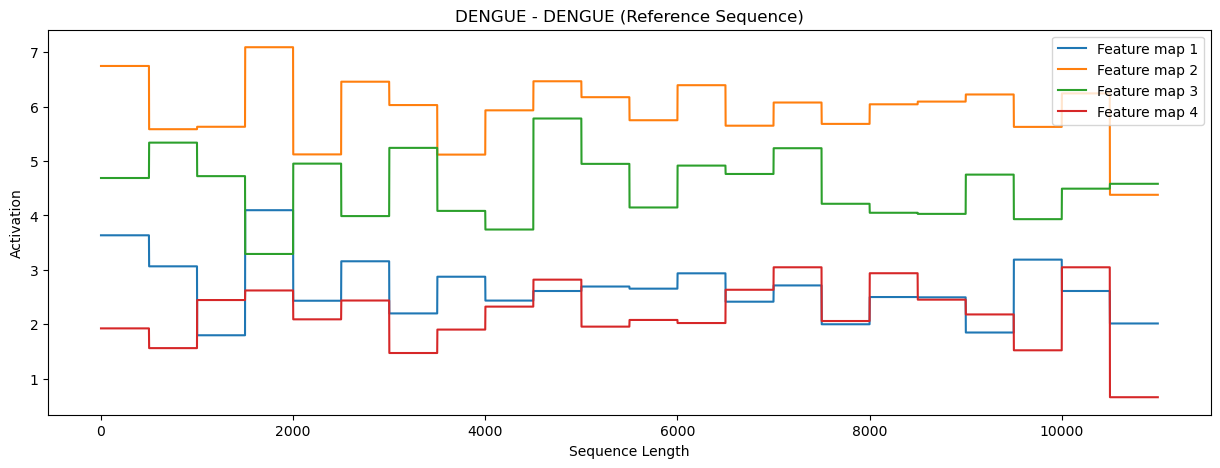

1/1 [==============================] - 0s 93ms/step


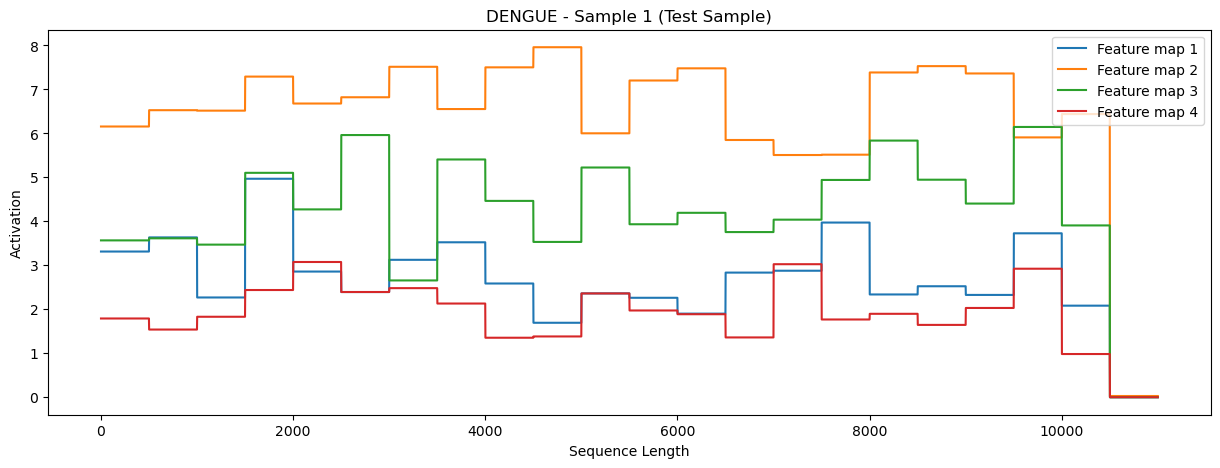

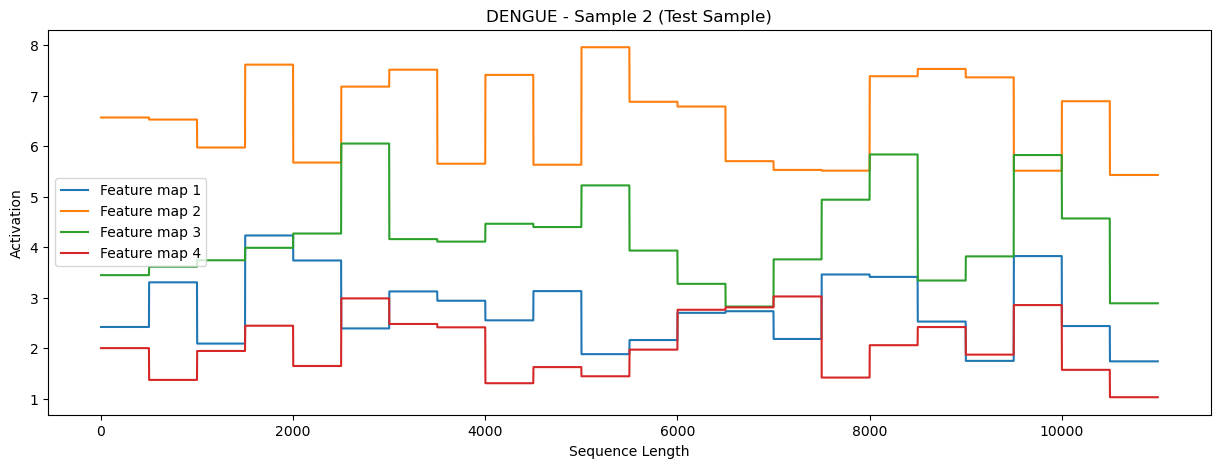

1/1 [==============================] - 0s 69ms/step


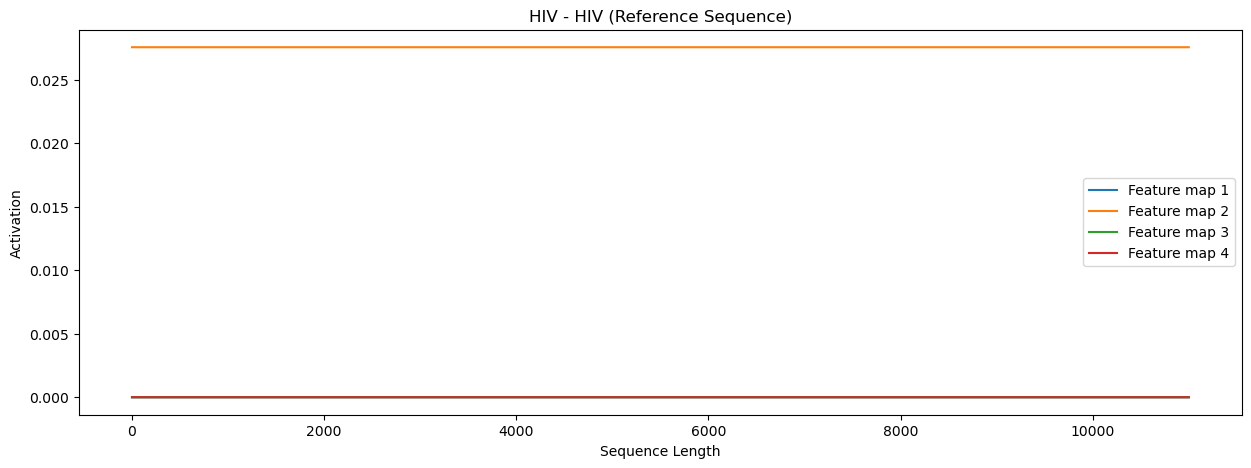

1/1 [==============================] - 0s 74ms/step


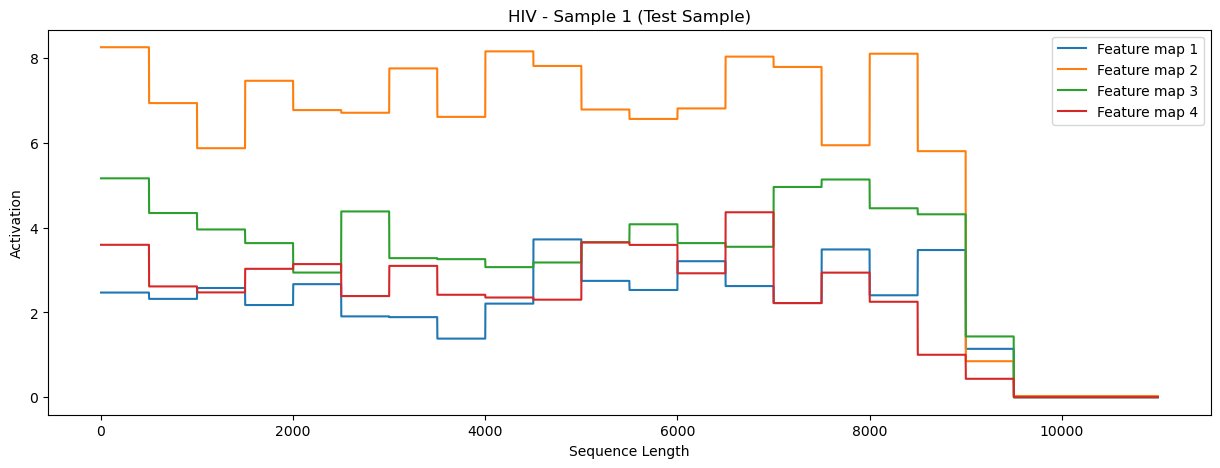

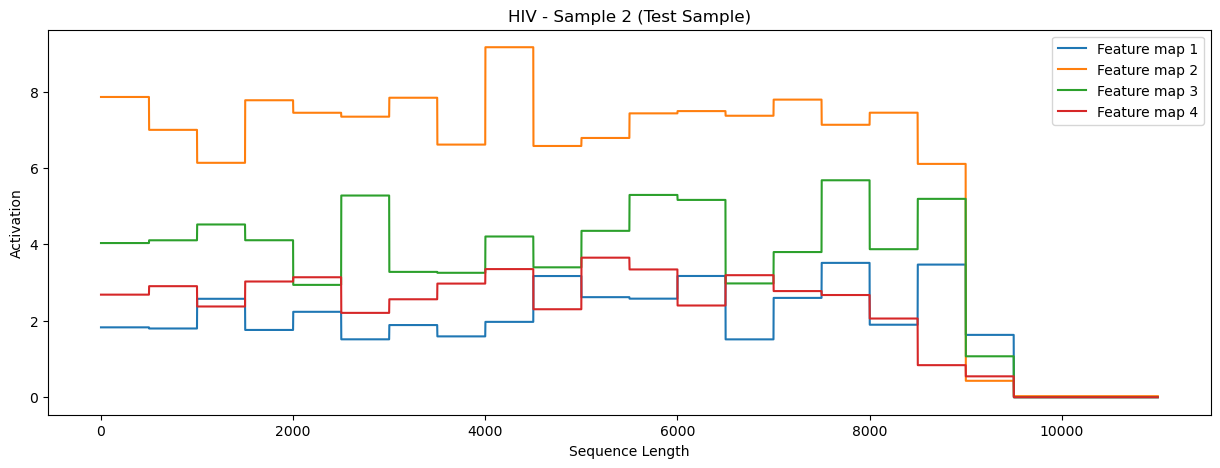

1/1 [==============================] - 0s 80ms/step


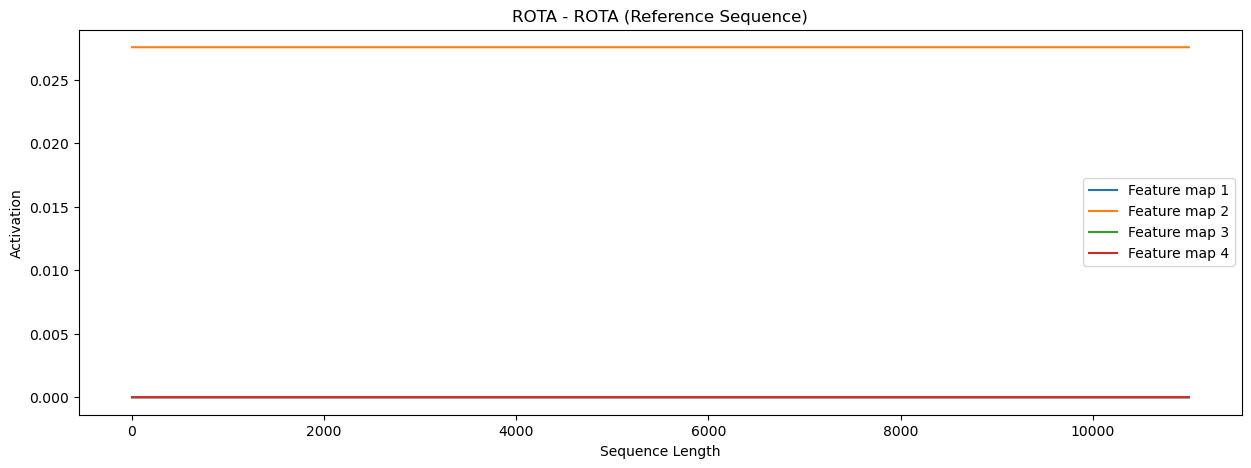

1/1 [==============================] - 0s 127ms/step


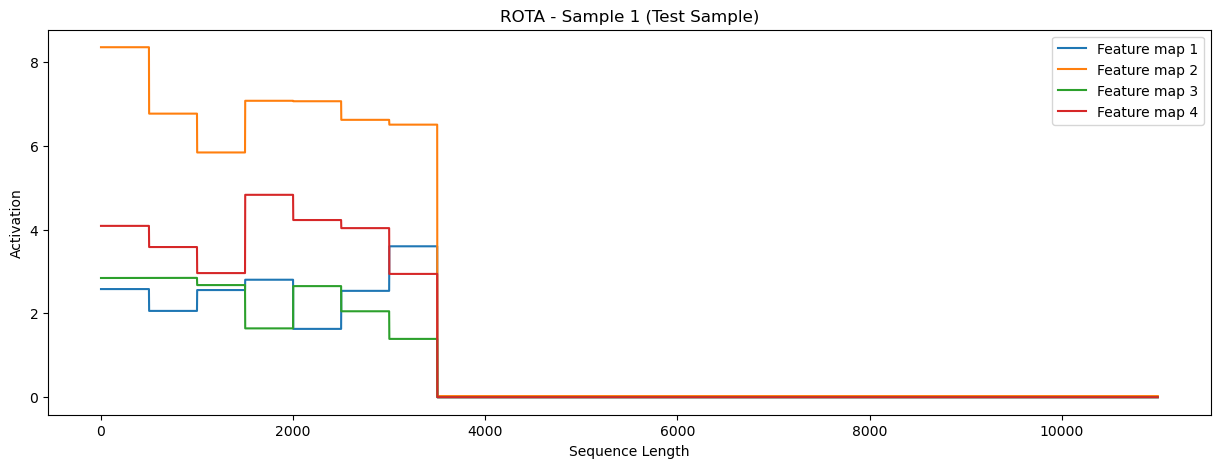

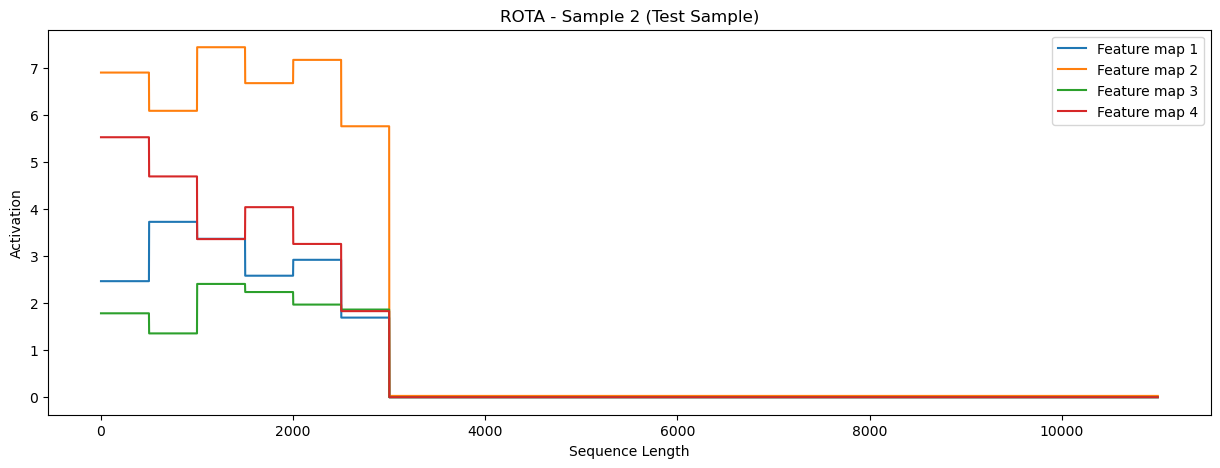

1/1 [==============================] - 0s 95ms/step


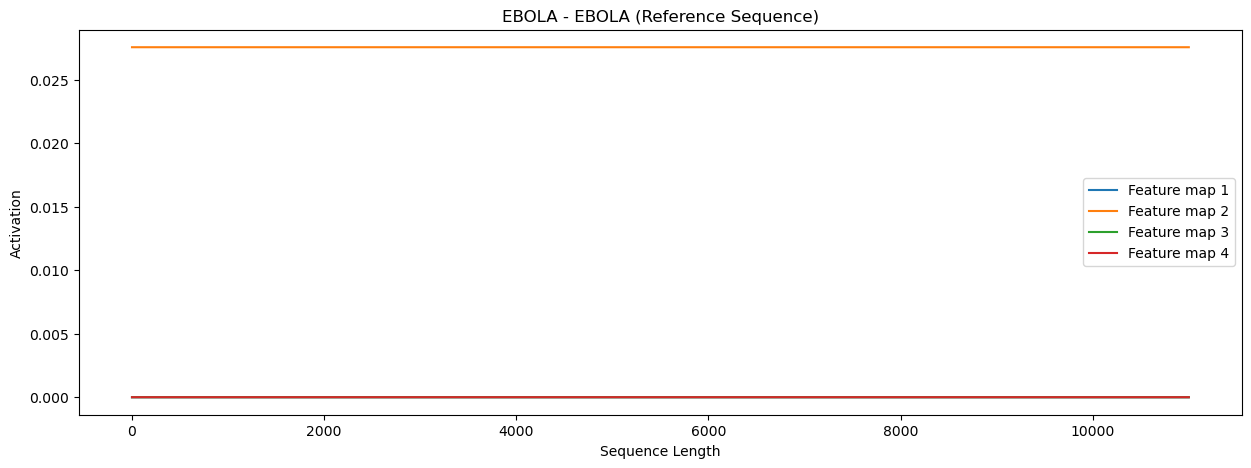

1/1 [==============================] - 0s 99ms/step


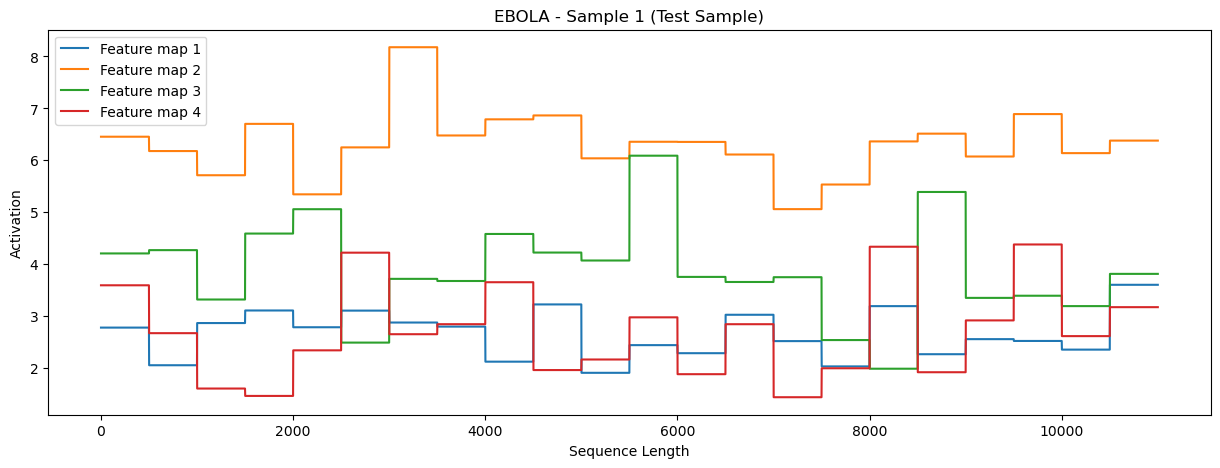

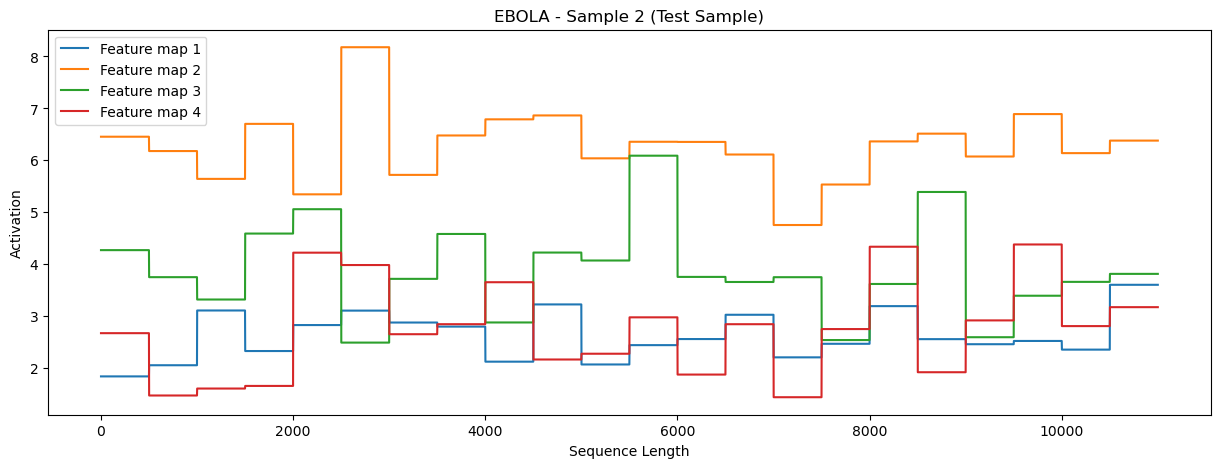

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, UpSampling1D

# Define a function to extract and unpool feature maps
def get_unpooled_feature_maps(model, pooling_layer_name, input_data, unpool_size):
    # Create a model that outputs the activations of the desired pooling layer
    activation_model = Model(inputs=model.input, outputs=model.get_layer(pooling_layer_name).output)
    # Reshape the input data to match the expected shape
    input_data = np.expand_dims(input_data, axis=0)  # Add a batch dimension
    # Get the activations for the input data
    pooled_activations = activation_model.predict(input_data)
    
    # Perform unpooling
    upsampling_layer = UpSampling1D(size=unpool_size)
    unpooled_activations = upsampling_layer(pooled_activations)
    
    return unpooled_activations.numpy()

# Define a dictionary to map folder names to disease names and labels
disease_mapping = {
    "HBV": {"disease": "HBV", "label": 0},
    "INFLUENZA": {"disease": "Influenza", "label": 1},
    "HCV": {"disease": "HCV", "label": 2},
    "DENGUE": {"disease": "Dengue", "label": 3},
    "HIV": {"disease": "HIV", "label": 4},
    "ROTA": {"disease": "Rota", "label": 5},
    "EBOLA": {"disease": "Ebola", "label": 6}
}

# Define the reference sequences for each disease
reference_sequences = {
    "HBV":"AATTCCACAACCTTCCACCAAACTCTGCAAGATCCCAGAGTGAGAGGCCTGTATTTCCCTGCTGGTGGCTCCAGTTCAGGAACAGTAAACCCTGTTCTGACTACTGCCTCTCCCTTATCGTCAATCTTCTCGAGGATTGGGGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTTCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTGCTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAGGATCCTCAACAACCAGCACGGGACCATGCCGGACCTGCATGACTACTGCTCAAGGAACCTCTATGTATCCCTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTCGGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAGCATCTTGAGTCCCTTTTTACCGCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAACCCTAACAAAACAAAGAGATGGGGTTACTCTCTAAATTTTATGGGTTATGTCATTGGATGTTATGGGTCCTTGCCACAAGAACACATCATACAAAAAATCAAAGAATGTTTTAGAAAACTTCCTATTAACAGGCCTATTGATTGGAAAGTATGTCAACGAATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTGCGTTGATGCCTTTGTATGCATGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTTTCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCTGACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTTCGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCAAACATTATCGGGACTGATAACTCTGTTGTCCTATCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGGGTCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTCCGACCGACCACGGGGCGCACCTCTCTTTACGCGGACTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCATGGAGACCACCGTGAACGCCCACCAAATATTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCAGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCAACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTGGGGCATGGACATCGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGTTTTTGCCTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGAAGCCTTAGAGTCTCCTGAGCATTGTTCACCTCACCATACTGCACTCAGGCAAGCAATTCTTTGCTGGGGGGAACTAATGACTCTAGCTACCTGGGTGGGTGTTAATTTGGAAGATCCAGCGTCTAGAGACCTAGTAGTCAGTTATGTCAACACTAATATGGGCCTAAAGTTCAGGCAACTCTTGTGGTTTCACATTTCTTGTCTCACTTTTGGAAGAGAAACAGTTATAGAGTATTTGGTGTCTTTCGGAGTGTGGATTCGCACTCCTCCAGCTTATAGACCACCAAATGCCCCTATCCTATCAACACTTCCGGAGACTACTGTTGTTAGACGACGAGGCAGGTCCCCTAGAAGAAGAACTCCCTCGCCTCGCAGACGAAGGTCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCGGGAATCTCAATGTTAGTATTCCTTGGACTCATAAGGTGGGGAACTTTACTGGGCTTTATTCTTCTACTGTACCTGTCTTTAATCCTCATTGGAAAACACCATCTTTTCCTAATATACATTTACACCAAGACATTATCAAAAAATGTGAACAGTTTGTAGGCCCACTCACAGTTAATGAGAAAAGAAGATTGCAATTGATTATGCCTGCCAGGTTTTATCCAAAGGTTACCAAATATTTACCATTGGATAAGGGTATTAAACCTTATTATCCAGAACATCTAGTTAATCATTACTTCCAAACTAGACACTATTTACACACTCTATGGAAGGCGGGTATATTATATAAGAGAGAAACAACACATAGCGCCTCATTTTGTGGGTCACCATATTCTTGGGAACAAGATCTACAGCATGGGGCAGAATCTTTCCACCAGCAATCCTCTGGGATTCTTTCCCGACCACCAGTTGGATCCAGCCTTCAGAGCAAACACCGCAAATCCAGATTGGGACTTCAATCCCAACAAGGACACCTGGCCAGACGCCAACAAGGTAGGAGCTGGAGCATTCGGGCTGGGTTTCACCCCACCGCACGGAGGCCTTTTGGGGTGGAGCCCTCAGGCTCAGGGCATACTACAAACTTTGCCAGCAAATCCGCCTCCTGCCTCCACCAATCGCCAGTCAGGAAGGCAGCCTACCCCGCTGTCTCCACCTTTGAGAAACACTCATCCTCAGGCCATGCAGTGG",
    "INFLUENZA":"ATGGAAAGAATAAAAGAACTAAGAGATTTGATGTCACAGTCTCGCACTCGCGAGATACTGACAAAAACAACTGTGGACCATATGGCCATAATCAAGAAATATACATCAGGAAGACAGGAGAAGAATCCTGCCCTTAGGATGAAGTGGATGATGGCAATGAAATATCCAATTACGGCAGACAAAAGGATAATGGAGATGATCCCGGAAAGAAATGAGCAAGGTCAGACCCTTTGGAGCAAGACAAATGATGCTGGATCAGACAGAGTGATGGTGTCACCTCTGGCTGTGACGTGGTGGAACAGAAATGGACCAACGACAAGCACAGTCCATTATCCAAAGGTCTATAAAACCTATTTTGAAAAGGTCGAAAGGCTAAAACATGGAACCTTCGGCCCCGTTCACTTCAGAAACCAGGTTAAAATACGCCGCAGGGTCGACATAAACCCGGGCCATGCAGATCTTAGTGCTAAAGAAGCACAGGATGTCATCATGGAGGTCGTATTCCCAAACGAAGTTGGAGCCAGAATATTGACATCAGAGTCACAGTTAACGATTACCAAGGAAAAGAAGAAGGAGCTTCAGGACTGCAAAATTGCCCCTTTAATGGTGGCTTACATGTTGGAGAGAGAACTGGTTCGCAAAACAAGATTCCTACCAGTAGCTGGAGGGACAAGCAGCGTGTATATCGAGGTGTTGCATTTGACCCAAGGGACCTGCTGGGAGCAAATGTACACACCGGGAGGGGAAGTGAGAAATGATGATGTTGATCAGAGTTTAATTATTGCTGCTAGAAATATTGTTAGAAGAGCAACAGTATCAGCAGACCCGTTGGCTTCGCTTTTGGAGATGTGCCATAGTACACAGATTGGCGGGATTAGGATGGTTGACATCCTTAGACAAAACCCAACAGAAGAACAGGCTGTGGATATATGTAAGGCAGCAATGGGTCTAAGGATCAGTTCATCCTTCAGCTTTGGAGGTTTCACTTTCAAAAGGACAAGTGGGTCATCTGTCAAAAGGGAAGAAGAAGTGCTCACAGGCAACCTCCAAACATTGAAAATAAGAGTACATGAAGGATATGAGGAATTCACAATGGTCGGGCGAAGAGCAACAGCCATTCTAAGGAAAGCAACCAGAAGACTGATCCAACTGATAGTGAGTGGGAAAGACGAGCAATCAATCGCCGAGGCAATCATAGTGGCAATGGTATTCTCACAAGAGGATTGTATGATAAAGGCAGTGAGAGGTGATTTGAACTTTGTCAACAGAGCAAACCAGCGGCTAAATCCCATGCATCAACTCCTGAGGCATTTCCAAAAGGATGCAAAGGTCCTGTTTCAAAACTGGGGAATTGAACCCATTGACAATGTAATGGGGATGATCGGAATATTGCCTGACATGACCCCCAGCACAGAGATGTCATTGAGAGGAGTGAGAGTTAGTAAAATGGGAGTAGATGAATATTCCAGCACTGAGAGAGTGGTCGTGAGTATTGATCGTTTCTTGAGGGTCCGAGACCAGAGGGGAAACGTACTCCTGTCTCCTGAAGAGGTTAGTGAAACACAGGGAACAGAAAAGCTGACTATAACATATTCATCGTCCATGATGTGGGAGATCAATGGTCCGGAATCAGTGCTAGTTAACACATATCAATGGATCATTAGAAATTGGGAAAATGTAAAGATTCAATGGTCCCAAGATCCTACAATGCTATACAATAAGATGGAATTTGAACCCTTTCAATCCCTAGTGCCTAAAGCTGCCAGGGGCCAATATAGTGGGTTCGTGAGGGTTCTATTCCAACAGATGCGTGACGTACTGGGAACATTTGACACTGTCCAAATAATAAAGCTATTACCATTTGCAGCAGCCCCGCCGAAGCAGAGTAGGATGCAGTTCTCTTCTCTAACTGTGAATGTGAGGGGTTCCGGAATGAGAATAGTTGTGAGAGGCAATTCTCCTGTGTTCAACTACAACAAGGCAACCAAGAGGCTTACGGTGCTTGGAAAGGATGCAGGTGCATTGATGGAAGACCCCGATGAGGGAACAGCAGGAGTGGAATCTGCGGTATTGAGGGGATTTCTGATTCTGGGCAAAGAAGACAAAAGATATGGGCCAGCATTGAGCATCAACGAATTGAGCAATCTTGCGAAAGGAGAGAAGGCTAATGTGTTGATAGGGCAAGGAGACGTTGTGTTGGTGATGAAACGGAAACGGGACTCTAGCATACTTACTGACAGTCAGACAGCGACCAAAAGGATTCGGATGGCCATCAATTAA",
    "HCV":"GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCTGTGAGGAACTACTGTCTTCACGCAGAAAGCGTCTAGCCATGGCGTTAGTATGAGTGTCGTGCAGCCTCCAGGACCCCCCCTCCCGGGAGAGCCATAGTGGTCTGCGGAACCGGTGAGTACACCGGAATTGCCAGGACGACCGGGTCCTTTCTTGGATAAACCCGCTCAATGCCTGGAGATTTGGGCGTGCCCCCGCAAGACTGCTAGCCGAGTAGTGTTGGGTCGCGAAAGGCCTTGTGGTACTGCCTGATAGGGTGCTTGCGAGTGCCCCGGGAGGTCTCGTAGACCGTGCACCATGAGCACGAATCCTAAACCTCAAAGAAAAACCAAACGTAACACCAACCGTCGCCCACAGGACGTCAAGTTCCCGGGTGGCGGTCAGATCGTTGGTGGAGTTTACTTGTTGCCGCGCAGGGGCCCTAGATTGGGTGTGCGCGCGACGAGGAAGACTTCCGAGCGGTCGCAACCTCGAGGTAGACGTCAGCCTATCCCCAAGGCACGTCGGCCCGAGGGCAGGACCTGGGCTCAGCCCGGGTACCCTTGGCCCCTCTATGGCAATGAGGGTTGCGGGTGGGCGGGATGGCTCCTGTCTCCCCGTGGCTCTCGGCCTAGCTGGGGCCCCACAGACCCCCGGCGTAGGTCGCGCAATTTGGGTAAGGTCATCGATACCCTTACGTGCGGCTTCGCCGACCTCATGGGGTACATACCGCTCGTCGGCGCCCCTCTTGGAGGCGCTGCCAGGGCCCTGGCGCATGGCGTCCGGGTTCTGGAAGACGGCGTGAACTATGCAACAGGGAACCTTCCTGGTTGCTCTTTCTCTATCTTCCTTCTGGCCCTGCTCTCTTGCCTGACTGTGCCCGCTTCAGCCTACCAAGTGCGCAATTCCTCGGGGCTTTACCATGTCACCAATGATTGCCCTAACTCGAGTATTGTGTACGAGGCGGCCGATGCCATCCTGCACACTCCGGGGTGTGTCCCTTGCGTTCGCGAGGGTAACGCCTCGAGGTGTTGGGTGGCGGTGACCCCCACGGTGGCCACCAGGGACGGCAAACTCCCCACAACGCAGCTTCGACGTCATATCGATCTGCTTGTCGGGAGCGCCACCCTCTGCTCGGCCCTCTACGTGGGGGACCTGTGCGGGTCTGTCTTTCTTGTTGGTCAACTGTTTACCTTCTCTCCCAGGCGCCACTGGACGACGCAAGACTGCAATTGTTCTATCTATCCCGGCCATATAACGGGTCATCGCATGGCATGGGATATGATGATGAACTGGTCCCCTACGGCAGCGTTGGTGGTAGCTCAGCTGCTCCGGATCCCACAAGCCATCATGGACATGATCGCTGGTGCTCACTGGGGAGTCCTGGCGGGCATAGCGTATTTCTCCATGGTGGGGAACTGGGCGAAGGTCCTGGTAGTGCTGCTGCTATTTGCCGGCGTCGACGCGGAAACCCACGTCACCGGGGGAAATGCCGGCCGCACCACGGCTGGGCTTGTTGGTCTCCTTACACCAGGCGCCAAGCAGAACATCCAACTGATCAACACCAACGGCAGTTGGCACATCAATAGCACGGCCTTGAATTGCAATGAAAGCCTTAACACCGGCTGGTTAGCAGGGCTCTTCTATCAACACAAATTCAACTCTTCAGGCTGTCCTGAGAGGTTGGCCAGCTGCCGACGCCTTACCGATTTTGCCCAGGGCTGGGGTCCTATCAGTTATGCCAACGGAAGCGGCCTCGACGAACGCCCCTACTGCTGGCACTACCCTCCAAGACCTTGTGGCATTGTGCCCGCAAAGAGCGTGTGTGGCCCGGTATATTGCTTCACTCCCAGCCCCGTGGTGGTGGGAACGACCGACAGGTCGGGCGCGCCTACCTACAGCTGGGGTGCAAATGATACGGATGTCTTCGTCCTTAACAACACCAGGCCACCGCTGGGCAATTGGTTCGGTTGTACCTGGATGAACTCAACTGGATTCACCAAAGTGTGCGGAGCGCCCCCTTGTGTCATCGGAGGGGTGGGCAACAACACCTTGCTCTGCCCCACTGATTGCTTCCGCAAACATCCGGAAGCCACATACTCTCGGTGCGGCTCCGGTCCCTGGATTACACCCAGGTGCATGGTCGACTACCCGTATAGGCTTTGGCACTATCCTTGTACCATCAATTACACCATATTCAAAGTCAGGATGTACGTGGGAGGGGTCGAGCACAGGCTGGAAGCGGCCTGCAACTGGACGCGGGGCGAACGCTGTGATCTGGAAGACAGGGACAGGTCCGAGCTCAGCCCGTTGCTGCTGTCCACCACACAGTGGCAGGTCCTTCCGTGTTCTTTCACGACCCTGCCAGCCTTGTCCACCGGCCTCATCCACCTCCACCAGAACATTGTGGACGTGCAGTACTTGTACGGGGTAGGGTCAAGCATCGCGTCCTGGGCCATTAAGTGGGAGTACGTCGTTCTCCTGTTCCTTCTGCTTGCAGACGCGCGCGTCTGCTCCTGCTTGTGGATGATGTTACTCATATCCCAAGCGGAGGCGGCTTTGGAGAACCTCGTAATACTCAATGCAGCATCCCTGGCCGGGACGCACGGTCTTGTGTCCTTCCTCGTGTTCTTCTGCTTTGCGTGGTATCTGAAGGGTAGGTGGGTGCCCGGAGCGGTCTACGCCCTCTACGGGATGTGGCCTCTCCTCCTGCTCCTGCTGGCGTTGCCTCAGCGGGCATACGCACTGGACACGGAGGTGGCCGCGTCGTGTGGCGGCGTTGTTCTTGTCGGGTTAATGGCGCTGACTCTGTCGCCATATTACAAGCGCTATATCAGCTGGTGCATGTGGTGGCTTCAGTATTTTCTGACCAGAGTAGAAGCGCAACTGCACGTGTGGGTTCCCCCCCTCAACGTCCGGGGGGGGCGCGATGCCGTCATCTTACTCATGTGTGTAGTACACCCGACCCTGGTATTTGACATCACCAAACTACTCCTGGCCATCTTCGGACCCCTTTGGATTCTTCAAGCCAGTTTGCTTAAAGTCCCCTACTTCGTGCGCGTTCAAGGCCTTCTCCGGATCTGCGCGCTAGCGCGGAAGATAGCCGGAGGTCATTACGTGCAAATGGCCATCATCAAGTTAGGGGCGCTTACTGGCACCTATGTGTATAACCATCTCACCCCTCTTCGAGACTGGGCGCACAACGGCCTGCGAGATCTGGCCGTGGCTGTGGAACCAGTCGTCTTCTCCCGAATGGAGACCAAGCTCATCACGTGGGGGGCAGATACCGCCGCGTGCGGTGACATCATCAACGGCTTGCCCGTCTCTGCCCGTAGGGGCCAGGAGATACTGCTTGGGCCAGCCGACGGAATGGTCTCCAAGGGGTGGAGGTTGCTGGCGCCCATCACGGCGTACGCCCAGCAGACGAGAGGCCTCCTAGGGTGTATAATCACCAGCCTGACTGGCCGGGACAAAAACCAAGTGGAGGGTGAGGTCCAGATCGTGTCAACTGCTACCCAAACCTTCCTGGCAACGTGCATCAATGGGGTATGCTGGACTGTCTACCACGGGGCCGGAACGAGGACCATCGCATCACCCAAGGGTCCTGTCATCCAGATGTATACCAATGTGGACCAAGACCTTGTGGGCTGGCCCGCTCCTCAAGGTTCCCGCTCATTGACACCCTGTACCTGCGGCTCCTCGGACCTTTACCTGGTCACGAGGCACGCCGATGTCATTCCCGTGCGCCGGCGAGGTGATAGCAGGGGTAGCCTGCTTTCGCCCCGGCCCATTTCCTACTTGAAAGGCTCCTCGGGGGGTCCGCTGTTGTGCCCCGCGGGACACGCCGTGGGCCTATTCAGGGCCGCGGTGTGCACCCGTGGAGTGGCTAAAGCGGTGGACTTTATCCCTGTGGAGAACCTAGGGACAACCATGAGATCCCCGGTGTTCACGGACAACTCCTCTCCACCAGCAGTGCCCCAGAGCTTCCAGGTGGCCCACCTGCATGCTCCCACCGGCAGCGGTAAGAGCACCAAGGTCCCGGCTGCGTACGCAGCCCAGGGCTACAAGGTGTTGGTGCTCAACCCCTCTGTTGCTGCAACGCTGGGCTTTGGTGCTTACATGTCCAAGGCCCATGGGGTTGATCCTAATATCAGGACCGGGGTGAGAACAATTACCACTGGCAGCCCCATCACGTACTCCACCTACGGCAAGTTCCTTGCCGACGGCGGGTGCTCAGGAGGTGCTTATGACATAATAATTTGTGACGAGTGCCACTCCACGGATGCCACATCCATCTTGGGCATCGGCACTGTCCTTGACCAAGCAGAGACTGCGGGGGCGAGACTGGTTGTGCTCGCCACTGCTACCCCTCCGGGCTCCGTCACTGTGTCCCATCCTAACATCGAGGAGGTTGCTCTGTCCACCACCGGAGAGATCCCCTTTTACGGCAAGGCTATCCCCCTCGAGGTGATCAAGGGGGGAAGACATCTCATCTTCTGCCACTCAAAGAAGAAGTGCGACGAGCTCGCCGCGAAGCTGGTCGCATTGGGCATCAATGCCGTGGCCTACTACCGCGGTCTTGACGTGTCTGTCATCCCGACCAGCGGCGATGTTGTCGTCGTGTCGACCGATGCTCTCATGACTGGCTTTACCGGCGACTTCGACTCTGTGATAGACTGCAACACGTGTGTCACTCAGACAGTCGATTTCAGCCTTGACCCTACCTTTACCATTGAGACAACCACGCTCCCCCAGGATGCTGTCTCCAGGACTCAACGCCGGGGCAGGACTGGCAGGGGGAAGCCAGGCATCTATAGATTTGTGGCACCGGGGGAGCGCCCCTCCGGCATGTTCGACTCGTCCGTCCTCTGTGAGTGCTATGACGCGGGCTGTGCTTGGTATGAGCTCACGCCCGCCGAGACTACAGTTAGGCTACGAGCGTACATGAACACCCCGGGGCTTCCCGTGTGCCAGGACCATCTTGAATTTTGGGAGGGCGTCTTTACGGGCCTCACTCATATAGATGCCCACTTTTTATCCCAGACAAAGCAGAGTGGGGAGAACTTTCCTTACCTGGTAGCGTACCAAGCCACCGTGTGCGCTAGGGCTCAAGCCCCTCCCCCATCGTGGGACCAGATGTGGAAGTGTTTGATCCGCCTTAAACCCACCCTCCATGGGCCAACACCCCTGCTATACAGACTGGGCGCTGTTCAGAATGAAGTCACCCTGACGCACCCAATCACCAAATACATCATGACATGCATGTCGGCCGACCTGGAGGTCGTCACGAGCACCTGGGTGCTCGTTGGCGGCGTCCTGGCTGCTCTGGCCGCGTATTGCCTGTCAACAGGCTGCGTGGTCATAGTGGGCAGGATCGTCTTGTCCGGGAAGCCGGCAATTATACCTGACAGGGAGGTTCTCTACCAGGAGTTCGATGAGATGGAAGAGTGCTCTCAGCACTTACCGTACATCGAGCAAGGGATGATGCTCGCTGAGCAGTTCAAGCAGAAGGCCCTCGGCCTCCTGCAGACCGCGTCCCGCCATGCAGAGGTTATCACCCCTGCTGTCCAGACCAACTGGCAGAAACTCGAGGTCTTTTGGGCGAAGCACATGTGGAATTTCATCAGTGGGATACAATACTTGGCGGGCCTGTCAACGCTGCCTGGTAACCCCGCCATTGCTTCATTGATGGCTTTTACAGCTGCCGTCACCAGCCCACTAACCACTGGCCAAACCCTCCTCTTCAACATATTGGGGGGGTGGGTGGCTGCCCAGCTCGCCGCCCCCGGTGCCGCTACTGCCTTTGTGGGTGCTGGCCTAGCTGGCGCCGCCATCGGCAGCGTTGGACTGGGGAAGGTCCTCGTGGACATTCTTGCAGGGTATGGCGCGGGCGTGGCGGGAGCTCTTGTAGCATTCAAGATCATGAGCGGTGAGGTCCCCTCCACGGAGGACCTGGTCAATCTGCTGCCCGCCATCCTCTCGCCTGGAGCCCTTGTAGTCGGTGTGGTCTGCGCAGCAATACTGCGCCGGCACGTTGGCCCGGGCGAGGGGGCAGTGCAATGGATGAACCGGCTAATAGCCTTCGCCTCCCGGGGGAACCATGTTTCCCCCACGCACTACGTGCCGGAGAGCGATGCAGCCGCCCGCGTCACTGCCATACTCAGCAGCCTCACTGTAACCCAGCTCCTGAGGCGACTGCATCAGTGGATAAGCTCGGAGTGTACCACTCCATGCTCCGGTTCCTGGCTAAGGGACATCTGGGACTGGATATGCGAGGTGCTGAGCGACTTTAAGACCTGGCTGAAAGCCAAGCTCATGCCACAACTGCCTGGGATTCCCTTTGTGTCCTGCCAGCGCGGGTATAGGGGGGTCTGGCGAGGAGACGGCATTATGCACACTCGCTGCCACTGTGGAGCTGAGATCACTGGACATGTCAAAAACGGGACGATGAGGATCGTCGGTCCTAGGACCTGCAGGAACATGTGGAGTGGGACGTTCCCCATTAACGCCTACACCACGGGCCCCTGTACTCCCCTTCCTGCGCCGAACTATAAGTTCGCGCTGTGGAGGGTGTCTGCAGAGGAATACGTGGAGATAAGGCGGGTGGGGGACTTCCACTACGTATCGGGTATGACTACTGACAATCTTAAATGCCCGTGCCAGATCCCATCGCCCGAATTTTTCACAGAATTGGACGGGGTGCGCCTACACAGGTTTGCGCCCCCTTGCAAGCCCTTGCTGCGGGAGGAGGTATCATTCAGAGTAGGACTCCACGAGTACCCGGTGGGGTCGCAATTACCTTGCGAGCCCGAACCGGACGTAGCCGTGTTGACGTCCATGCTCACTGATCCCTCCCATATAACAGCAGAGGCGGCCGGGAGAAGGTTGGCGAGAGGGTCACCCCCTTCTATGGCCAGCTCCTCGGCTAGCCAGCTGTCCGCTCCATCTCTCAAGGCAACTTGCACCGCCAACCATGACTCCCCTGACGCCGAGCTCATAGAGGCTAACCTCCTGTGGAGGCAGGAGATGGGCGGCAACATCACCAGGGTTGAGTCAGAGAACAAAGTGGTGATTCTGGACTCCTTCGATCCGCTTGTGGCAGAGGAGGATGAGCGGGAGGTCTCCGTACCTGCAGAAATTCTGCGGAAGTCTCGGAGATTCGCCCGGGCCCTGCCCGTCTGGGCGCGGCCGGACTACAACCCCCCGCTAGTAGAGACGTGGAAAAAGCCTGACTACGAACCACCTGTGGTCCATGGCTGCCCGCTACCACCTCCACGGTCCCCTCCTGTGCCTCCGCCTCGGAAAAAGCGTACGGTGGTCCTCACCGAATCAACCCTATCTACTGCCTTGGCCGAGCTTGCCACCAAAAGTTTTGGCAGCTCCTCAACTTCCGGCATTACGGGCGACAATACGACAACATCCTCTGAGCCCGCCCCTTCTGGCTGCCCCCCCGACTCCGACGTTGAGTCCTATTCTTCCATGCCCCCCCTGGAGGGGGAGCCTGGGGATCCGGATCTCAGCGACGGGTCATGGTCGACGGTCAGTAGTGGGGCCGACACGGAAGATGTCGTGTGCTGCTCAATGTCTTATTCCTGGACAGGCGCACTCGTCACCCCGTGCGCTGCGGAAGAACAAAAACTGCCCATCAACGCACTGAGCAACTCGTTGCTACGCCATCACAATCTGGTGTATTCCACCACTTCACGCAGTGCTTGCCAAAGGCAGAAGAAAGTCACATTTGACAGACTGCAAGTTCTGGACAGCCATTACCAGGACGTGCTCAAGGAGGTCAAAGCAGCGGCGTCAAAAGTGAAGGCTAACTTGCTATCCGTAGAGGAAGCTTGCAGCCTGACGCCCCCACATTCAGCCAAATCCAAGTTTGGCTATGGGGCAAAAGACGTCCGTTGCCATGCCAGAAAGGCCGTAGCCCACATCAACTCCGTGTGGAAAGACCTTCTGGAAGACAGTGTAACACCAATAGACACTACCATCATGGCCAAGAACGAGGTTTTCTGCGTTCAGCCTGAGAAGGGGGGTCGTAAGCCAGCTCGTCTCATCGTGTTCCCCGACCTGGGCGTGCGCGTGTGCGAGAAGATGGCCCTGTACGACGTGGTTAGCAAGCTCCCCCTGGCCGTGATGGGAAGCTCCTACGGATTCCAATACTCACCAGGACAGCGGGTTGAATTCCTCGTGCAAGCGTGGAAGTCCAAGAAGACCCCGATGGGGTTCTCGTATGATACCCGCTGTTTTGACTCCACAGTCACTGAGAGCGACATCCGTACGGAGGAGGCAATTTACCAATGTTGTGACCTGGACCCCCAAGCCCGCGTGGCCATCAAGTCCCTCACTGAGAGGCTTTATGTTGGGGGCCCTCTTACCAATTCAAGGGGGGAAAACTGCGGCTACCGCAGGTGCCGCGCGAGCGGCGTACTGACAACTAGCTGTGGTAACACCCTCACTTGCTACATCAAGGCCCGGGCAGCCTGTCGAGCCGCAGGGCTCCAGGACTGCACCATGCTCGTGTGTGGCGACGACTTAGTCGTTATCTGTGAAAGTGCGGGGGTCCAGGAGGACGCGGCGAGCCTGAGAGCCTTCACGGAGGCTATGACCAGGTACTCCGCCCCCCCCGGGGACCCCCCACAACCAGAATACGACTTGGAGCTTATAACATCATGCTCCTCCAACGTGTCAGTCGCCCACGACGGCGCTGGAAAGAGGGTCTACTACCTTACCCGTGACCCTACAACCCCCCTCGCGAGAGCCGCGTGGGAGACAGCAAGACACACTCCAGTCAATTCCTGGCTAGGCAACATAATCATGTTTGCCCCCACACTGTGGGCGAGGATGATACTGATGACCCATTTCTTTAGCGTCCTCATAGCCAGGGATCAGCTTGAACAGGCTCTTAACTGTGAGATCTACGGAGCCTGCTACTCCATAGAACCACTGGATCTACCTCCAATCATTCAAAGACTCCATGGCCTCAGCGCATTTTCACTCCACAGTTACTCTCCAGGTGAAATCAATAGGGTGGCCGCATGCCTCAGAAAACTTGGGGTCCCGCCCTTGCGAGCTTGGAGACACCGGGCCCGGAGCGTCCGCGCTAGGCTTCTGTCCAGAGGAGGCAGGGCTGCCATATGTGGCAAGTACCTCTTCAACTGGGCAGTAAGAACAAAGCTCAAACTCACTCCAATAGCGGCCGCTGGCCGGCTGGACTTGTCCGGTTGGTTCACGGCTGGCTACAGCGGGGGAGACATTTATCACAGCGTGTCTCATGCCCGGCCCCGCTGGTTCTGGTTTTGCCTACTCCTGCTCGCTGCAGGGGTAGGCATCTACCTCCTCCCCAACCGATGAAGGTTGGGGTAAACACTCCGGCCTCTTAAGCCATTTCCTGTTTTTTTTTTTTTTTTTTTTTTTTTTTTCTTTTTTTTTTTCTTTCCTTTCCTTCTTTTTTTCCTTTCTTTTTCCCTTCTTTAATGGTGGCTCCATCTTAGCCCTAGTCACGGCTAGCTGTGAAAGGTCCGTGAGCCGCATGACTGCAGAGAGTGCTGATACTGGCCTCTCTGCAGATCATGT",
    "DENGUE":"AGTTGTTAGTCTGTGTGGACCGACAAGGACAGTTCCAAATCGGAAGCTTGCTTAACACAGTTCTAACAGTTTGTTTGAATAGAGAGCAGATCTCTGGAAAAATGAACCAACGAAAAAAGGTGGTTAGACCACCTTTCAATATGCTGAAACGCGAGAGAAACCGCGTATCAACCCCTCAAGGGTTGGTGAAGAGATTCTCAACCGGACTTTTTTCTGGGAAAGGACCCTTACGGATGGTGCTAGCATTCATCACGTTTTTGCGAGTCCTTTCCATCCCACCAACAGCAGGGATTCTGAAGAGATGGGGACAGTTGAAGAAAAATAAGGCCATCAAGATACTGATTGGATTCAGGAAGGAGATAGGCCGCATGCTGAACATCTTGAACGGGAGAAAAAGGTCAACGATAACATTGCTGTGCTTGATTCCCACCGTAATGGCGTTTTCCCTCAGCACAAGAGATGGCGAACCCCTCATGATAGTGGCAAAACATGAAAGGGGGAGACCTCTCTTGTTTAAGACAACAGAGGGGATCAACAAATGCACTCTCATTGCCATGGACTTGGGTGAAATGTGTGAGGACACTGTCACGTATAAATGCCCCCTACTGGTCAATACCGAACCTGAAGACATTGATTGCTGGTGCAACCTCACGTCTACCTGGGTCATGTATGGGACATGCACCCAGAGCGGAGAACGGAGACGAGAGAAGCGCTCAGTAGCTTTAACACCACATTCAGGAATGGGATTGGAAACAAGAGCTGAGACATGGATGTCATCGGAAGGGGCTTGGAAGCATGCTCAGAGAGTAGAGAGCTGGATACTCAGAAACCCAGGATTCGCGCTCTTGGCAGGATTTATGGCTTATATGATTGGGCAAACAGGAATCCAGCGAACTGTCTTCTTTGTCCTAATGATGCTGGTCGCCCCATCCTACGGAATGCGATGCGTAGGAGTAGGAAACAGAGACTTTGTGGAAGGAGTCTCAGGTGGAGCATGGGTCGACCTGGTGCTAGAACATGGAGGATGCGTCACAACCATGGCCCAGGGAAAACCAACCTTGGATTTTGAACTGACTAAGACAACAGCCAAGGAAGTGGCTCTGTTAAGAACCTATTGCATTGAAGCCTCAATATCAAACATAACTACGGCAACAAGATGTCCAACGCAAGGAGAGCCTTATCTGAAAGAGGAACAGGACCAACAGTACATTTGCCGGAGAGATGTGGTAGACAGAGGGTGGGGCAATGGCTGTGGCTTGTTTGGAAAAGGAGGAGTTGTGACATGTGCGAAGTTTTCATGTTCGGGGAAGATAACAGGCAATTTGGTCCAAATTGAGAACCTTGAATACACAGTGGTTGTAACAGTCCACAATGGAGACACCCATGCAGTAGGAAATGACACATCCAATCATGGAGTTACAGCCATGATAACTCCCAGGTCACCATCGGTGGAAGTCAAATTGCCGGACTATGGAGAACTAACACTCGATTGTGAACCCAGGTCTGGAATTGACTTTAATGAGATGATTCTGATGAAAATGAAAAAGAAAACATGGCTCGTGCATAAGCAATGGTTTTTGGATCTGCCTCTTCCATGGACAGCAGGAGCAGACACATCAGAGGTTCACTGGAATTACAAAGAGAGAATGGTGACATTTAAGGTTCCTCATGCCAAGAGACAGGATGTGACAGTGCTGGGATCTCAGGAAGGAGCCATGCATTCTGCCCTCGCTGGAGCCACAGAAGTGGACTCCGGTGATGGAAATCACATGTTTGCAGGACATCTTAAGTGCAAAGTCCGTATGGAGAAATTGAGAATCAAGGGAATGTCATACACGATGTGTTCAGGAAAGTTTTCAATTGACAAAGAGATGGCAGAAACACAGCATGGGACAACAGTGGTGAAAGTCAAGTATGAAGGTGCTGGAGCTCCGTGTAAAGTCCCCATAGAGATAAGAGATGTAAACAAGGAAAAAGTGGTTGGGCGTATCATCTCATCCACCCCTTTGGCTGAGAATACCAACAGTGTAACCAACATAGAATTAGAACCCCCCTTTGGGGACAGCTACATAGTGATAGGTGTTGGAAACAGCGCATTAACACTCCATTGGTTCAGGAAAGGGAGTTCCATTGGCAAGATGTTTGAGTCCACATACAGAGGTGCAAAACGAATGGCCATTCTAGGTGAAACAGCTTGGGATTTTGGTTCCGTTGGTGGACTGTTCACATCATTGGGAAAGGCTGTGCACCAGGTTTTTGGAAGTGTGTATACAACCATGTTTGGAGGAGTCTCATGGATGATTAGAATCCTAATTGGGTTCTTAGTGTTGTGGATTGGCACGAACTCGAGGAACACTTCAATGGCTATGACGTGCATAGCTGTTGGAGGAATCACTCTGTTTCTGGGCTTCACAGTTCAAGCAGACATGGGTTGTGTGGCGTCATGGAGTGGGAAAGAATTGAAGTGTGGAAGCGGAATTTTTGTGGTTGACAACGTGCACACTTGGACAGAACAGTACAAATTTCAACCAGAGTCCCCAGCGAGACTAGCGTCTGCAATATTAAATGCCCACAAAGATGGGGTCTGTGGAATTAGATCAACCACGAGGCTGGAAAATGTCATGTGGAAGCAAATAACCAACGAGCTAAACTATGTTCTCTGGGAAGGAGGACATGACCTCACTGTAGTGGCTGGGGATGTGAAGGGGGTGTTGACCAAAGGCAAGAGAGCACTCACACCCCCAGTGAGTGATCTGAAATATTCATGGAAGACATGGGGAAAAGCAAAAATCTTCACCCCAGAAGCAAGAAATAGCACATTTTTAATAGACGGACCAGACACCTCTGAATGCCCCAATGAACGAAGAGCATGGAACTCTCTTGAGGTGGAAGACTATGGATTTGGCATGTTCACGACCAACATATGGATGAAATTCCGAGAAGGAAGTTCAGAAGTGTGTGACCACAGGTTAATGTCAGCTGCAATTAAAGATCAGAAAGCTGTGCATGCTGACATGGGTTATTGGATAGAGAGCTCAAAAAACCAGACCTGGCAGATAGAGAAAGCATCTCTTATTGAAGTGAAAACATGTCTGTGGCCCAAGACCCACACACTGTGGAGCAATGGAGTGCTGGAAAGCCAGATGCTCATTCCAAAATCATATGCGGGCCCTTTTTCACAGCACAATTACCGCCAGGGCTATGCCACGCAAACCGTGGGCCCATGGCACTTAGGCAAATTAGAGATAGACTTTGGAGAATGCCCCGGAACAACAGTCACAATTCAGGAGGATTGTGACCATAGAGGCCCATCTTTGAGGACCACCACTGCATCTGGAAAACTAGTCACGCAATGGTGCTGCCGCTCCTGCACGATGCCTCCCTTAAGGTTCTTGGGAGAAGATGGGTGCTGGTATGGGATGGAGATTAGGCCCTTGAGTGAAAAAGAAGAGAACATGGTCAAATCACAGGTGACGGCCGGACAGGGCACATCAGAAACTTTTTCTATGGGTCTGTTGTGCCTGACCTTGTTTGTGGAAGAATGCTTGAGGAGAAGAGTCACTAGGAAACACATGATATTAGTTGTGGTGATCACTCTTTGTGCTATCATCCTGGGAGGCCTCACATGGATGGACTTACTACGAGCCCTCATCATGTTGGGGGACACTATGTCTGGTAGAATAGGAGGACAGATCCACCTAGCCATCATGGCAGTGTTCAAGATGTCACCAGGATACGTGCTGGGTGTGTTTTTAAGGAAACTCACTTCAAGAGAGACAGCACTAATGGTAATAGGAATGGCCATGACAACGGTGCTTTCAATTCCACATGACCTTATGGAACTCATTGATGGAATATCACTGGGACTAATTTTGCTAAAAATAGTAACACAGTTTGACAACACCCAAGTGGGAACCTTAGCTCTTTCCTTGACTTTCATAAGATCAACAATGCCATTGGTCATGGCTTGGAGGACCATTATGGCTGTGTTGTTTGTGGTCACACTCATTCCTTTGTGCAGGACAAGCTGTCTTCAAAAACAGTCTCATTGGGTAGAAATAACAGCACTCATCCTAGGAGCCCAAGCTCTGCCAGTGTACCTAATGACTCTTATGAAAGGAGCCTCAAGAAGATCTTGGCCTCTTAACGAGGGCATAATGGCTGTGGGTTTGGTTAGTCTCTTAGGAAGCGCTCTTTTAAAGAATGATGTCCCTTTAGCTGGCCCAATGGTGGCAGGAGGCTTACTTCTGGCGGCTTACGTGATGAGTGGTAGCTCAGCAGATCTGTCACTAGAGAAGGCCGCCAACGTGCAGTGGGATGAAATGGCAGACATAACAGGCTCAAGCCCAATCGTAGAAGTGAAGCAGGATGAAGATGGCTCTTTCTCCATACGGGACGTCGAGGAAACCAATATGATAACCCTTTTGGTGAAACTGGCACTGATAACAGTGTCAGGTCTCTACCCCTTGGCAATTCCAGTCACAATGACCTTATGGTACATGTGGCAAGTGAAAACACAAAGATCAGGAGCCCTGTGGGACGTCCCCTCACCCGCTGCCACTAAAAAAGCCGCACTGTCTGAAGGAGTGTACAGGATCATGCAAAGAGGGTTATTCGGGAAAACTCAGGTTGGAGTAGGGATACACATGGAAGGTGTATTTCACACAATGTGGCATGTAACAAGAGGATCAGTGATCTGCCACGAGACTGGGAGATTGGAGCCATCTTGGGCTGACGTCAGGAATGACATGATATCATACGGTGGGGGATGGAGGCTTGGAGACAAATGGGACAAAGAAGAAGACGTTCAGGTCCTCGCCATAGAACCAGGAAAAAATCCTAAACATGTCCAAACGAAACCTGGCCTTTTCAAGACCCTAACTGGAGAAATTGGAGCAGTAACATTAGATTTCAAACCCGGAACGTCTGGTTCTCCCATCATCAACAGGAAAGGAAAAGTCATCGGACTCTATGGAAATGGAGTAGTTACCAAATCAGGTGATTACGTCAGTGCCATAACGCAAGCCGAAAGAATTGGAGAGCCAGATTATGAAGTGGATGAGGACATTTTTCGAAAGAAAAGATTAACTATAATGGACTTACACCCCGGAGCTGGAAAGACAAAAAGAATTCTTCCATCAATAGTGAGAGAAGCCTTAAAAAGGAGGCTACGAACTTTGATTTTAGCTCCCACGAGAGTGGTGGCGGCCGAGATGGAAGAGGCCCTACGTGGACTGCCAATCCGTTATCAGACCCCAGCTGTGAAATCAGAACACACAGGAAGAGAGATTGTAGACCTCATGTGTCATGCAACCTTCACAACAAGACTTTTGTCATCAACCAGGGTTCCAAATTACAACCTTATAGTGATGGATGAAGCACATTTCACCGATCCTTCTAGTGTCGCGGCTAGAGGATACATCTCGACCAGGGTGGAAATGGGAGAGGCAGCAGCCATCTTCATGACCGCAACCCCTCCCGGAGCGACAGATCCCTTTCCCCAGAGCAACAGCCCAATAGAAGACATCGAGAGGGAAATTCCGGAAAGGTCATGGAACACAGGGTTCGACTGGATAACAGACTACCAAGGGAAAACTGTGTGGTTTGTTCCCAGCATAAAAGCTGGAAATGACATTGCAAATTGTTTGAGAAAGTCGGGAAAGAAAGTTATCCAGTTGAGTAGGAAAACCTTTGATACAGAGTATCCAAAAACGAAACTCACGGACTGGGACTTTGTGGTCACTACAGACATATCTGAAATGGGGGCCAATTTTAGAGCCGGGAGAGTGATAGACCCTAGAAGATGCCTCAAGCCAGTTATCCTACCAGATGGGCCAGAGAGAGTCATTTTAGCAGGTCCTATTCCAGTGACTCCAGCAAGCGCTGCTCAGAGAAGAGGGCGAATAGGAAGGAACCCAGCACAAGAAGACGACCAATACGTTTTCTCCGGAGACCCACTAAAAAATGATGAAGATCATGCCCACTGGACAGAAGCAAAGATGCTGCTTGACAATATCTACACCCCAGAAGGGATCATTCCAACATTGTTTGGTCCGGAAAGGGAAAAAACCCAAGCCATTGATGGAGAGTTTCGCCTCAGAGGGGAACAAAGGAAGACTTTTGTGGAATTAATGAGGAGAGGAGACCTTCCGGTGTGGCTGAGCTATAAGGTAGCTTCTGCTGGCATTTCTTACGAAGATCGGGAATGGTGCTTCACAGGGGAAAGAAATAACCAAATTTTAGAAGAAAACATGGAGGTTGAAATTTGGACTAGAGAGGGAGAAAAGAAAAAGCTAAGGCCAAGATGGTTAGATGCACGTGTATACGCTGACCCCATGGCTTTGAAGGATTTCAAGGAGTTTGCCAGTGGAAGGAAGAGTATAACTCTCGACATCCTAACAGAGATTGCCAGTTTGCCAACTTACCTTTCCTCTAGGGCCAAGCTCGCCCTTGATAACATAGTCATGCTCCACACAACAGAAAGAGGAGGGAGGGCCTATCAACACGCCCTGAACGAACTTCCGGAGTCACTGGAAACACTCATGCTTGTAGCTTTACTAGGTGCTATGACAGCAGGCATCTTCCTGTTTTTCATGCAAGGGAAAGGAATAGGGAAATTGTCAATGGGTTTGATAACCATTGCGGTGGCTAGTGGCTTGCTCTGGGTAGCAGAAATTCAACCCCAGTGGATAGCGGCCTCAATCATACTAGAGTTTTTTCTCATGGTACTGTTGATACCGGAACCAGAAAAACAAAGGACCCCACAAGACAATCAATTGATCTACGTCATATTGACCATTCTCACCATCATTGGTCTAATAGCAGCCAACGAGATGGGGCTGATTGAAAAAACAAAAACGGATTTTGGGTTTTACCAGGTAAAAACAGAAACCACCATCCTCGATGTGGACTTGAGACCAGCTTCAGCATGGACGCTCTATGCAGTAGCCACCACAATTCTGACTCCCATGCTGAGACACACCATAGAAAACACGTCGGCCAACCTATCTCTAGCAGCCATTGCCAACCAGGCAGCCGTCCTAATGGGGCTTGGAAAAGGATGGCCGCTCCACAGAATGGACCTCGGTGTGCCGCTGTTAGCAATGGGATGCTATTCTCAAGTGAACCCAACAACCTTGACAGCATCCTTAGTCATGCTTTTAGTCCATTATGCAATAATAGGCCCAGGATTGCAGGCAAAAGCCACAAGAGAGGCCCAGAAAAGGACAGCTGCTGGGATCATGAAAAATCCCACAGTGGACGGGATAACAGTAATAGATCTAGAACCAATATCCTATGACCCAAAATTTGAAAAGCAATTAGGGCAGGTCATGCTACTAGTCTTGTGTGCTGGACAACTACTCTTGATGAGAACAACATGGGCTTTCTGTGAAGTCTTGACTTTGGCCACAGGACCAATCTTGACCTTGTGGGAGGGCAACCCGGGAAGGTTTTGGAACACGACCATAGCCGTATCCACCGCCAACATTTTCAGGGGAAGTTACTTGGCGGGAGCTGGACTGGCTTTTTCACTCATAAAGAATGCACAAACCCCTAGGAGGGGAACTGGGACCACAGGAGAGACACTGGGAGAGAAGTGGAAGAGACAGCTAAACTCATTAGACAGAAAAGAGTTTGAAGAGTATAAAAGAAGTGGAATACTAGAAGTGGACAGGACTGAAGCCAAGTCTGCCCTGAAAGATGGGTCTAAAATCAAGCATGCAGTATCAAGAGGGTCCAGTAAGATCAGATGGATTGTTGAGAGAGGGATGGTAAAGCCAAAAGGGAAAGTTGTAGATCTTGGCTGTGGGAGAGGAGGATGGTCTTATTACATGGCGACACTCAAGAACGTGACTGAAGTGAAAGGGTATACAAAAGGAGGTCCAGGACATGAAGAACCGATTCCCATGGCTACTTATGGTTGGAATTTGGTCAAACTCCATTCAGGGGTTGACGTGTTCTACAAACCCACAGAGCAAGTGGACACCCTGCTCTGTGATATTGGGGAGTCATCTTCTAATCCAACAATAGAGGAAGGAAGAACATTAAGAGTTTTGAAGATGGTGGAGCCATGGCTCTCTTCAAAACCTGAATTCTGCATCAAAGTCCTTAACCCCTACATGCCAACAGTCATAGAAGAGCTGGAGAAACTGCAGAGAAAACATGGTGGGAACCTTGTCAGATGCCCGCTGTCCAGGAACTCCACCCATGAGATGTATTGGGTGTCAGGAGCGTCGGGAAACATTGTGAGCTCTGTGAACACAACATCAAAGATGTTGTTGAACAGGTTCACAACAAGGCATAGGAAACCCACTTATGAGAAGGACGTAGATCTTGGGGCAGGAACGAGAAGTGTCTCCACTGAAACAGAAAAACCAGACATGACAATCATTGGGAGAAGGCTTCAGCGATTGCAAGAAGAGCACAAAGAAACCTGGCATTATGATCAGGAAAACCCATACAGAACCTGGGCGTATCATGGAAGCTATGAAGCTCCTTCGACAGGCTCTGCATCCTCCATGGTGAACGGGGTGGTAAAACTGCTAACAAAACCCTGGGATGTGATTCCAATGGTGACTCAGTTAGCCATGACAGATACAACCCCTTTTGGGCAACAAAGAGTGTTCAAAGAGAAGGTGGATACCAGAACACCACAACCAAAACCCGGTACACGAATGGTTATGACCACGACAGCCAATTGGCTGTGGGCCCTCCTTGGAAAGAAGAAAAATCCCAGACTGTGCACAAGGGAAGAGTTCATCTCAAAAGTTAGATCAAACGCAGCCATAGGCGCAGTCTTTCAGGAAGAACAGGGATGGACATCAGCCAGTGAAGCTGTGAATGACAGCCGGTTTTGGGAACTGGTTGACAAAGAAAGGGCCCTACACCAGGAAGGGAAATGTGAATCGTGTGTCTATAACATGATGGGAAAACGTGAGAAAAAGTTAGGAGAGTTTGGCAGAGCCAAGGGAAGCCGAGCAATCTGGTACATGTGGCTGGGAGCGCGGTTTCTGGAATTTGAAGCCCTGGGTTTTTTGAATGAAGATCACTGGTTTGGCAGAGAAAATTCATGGAGTGGAGTGGAAGGGGAAGGTCTGCACAGATTGGGATATATCCTGGAGGAGATAGACAAGAAGGATGGAGACCTAATGTATGCTGATGACACAGCAGGCTGGGACACAAGAATCACTGAGGATGACCTTCAAAATGAGGAACTGATCACGGAACAGATGGCTCCCCACCACAAGATCCTAGCCAAAGCCATTTTCAAACTAACCTATCAAAACAAAGTGGTGAAAGTCCTCAGACCCACACCGCGGGGAGCGGTGATGGATATCATATCCAGGAAAGACCAAAGAGGTAGTGGACAAGTTGGAACATATGGTTTGAACACATTCACCAACATGGAAGTTCAACTCATCCGCCAAATGGAAGCTGAAGGAGTCATCACACAAGATGACATGCAGAACCCAAAAGGGTTGAAAGAAAGAGTTGAGAAATGGCTGAAAGAGTGTGGTGTCGACAGGTTAAAGAGGATGGCAATCAGTGGAGACGATTGCGTGGTGAAGCCCCTAGATGAGAGGTTTGGCACTTCCCTCCTCTTCTTGAACGACATGGGAAAGGTGAGGAAAGACATTCCGCAGTGGGAACCATCTAAGGGATGGAAAAACTGGCAAGAGGTTCCTTTTTGCTCCCACCACTTTCACAAGATCTTTATGAAGGATGGCCGCTCACTAGTTGTTCCATGTAGAAACCAGGATGAACTGATAGGGAGAGCCAGAATCTCGCAGGGAGCTGGATGGAGCTTAAGAGAAACAGCCTGCCTGGGCAAAGCTTACGCCCAGATGTGGTCGCTTATGTACTTCCACAGAAGGGATCTGCGTTTAGCCTCCATGGCCATATGCTCAGCAGTTCCAACGGAATGGTTTCCAACAAGCAGAACAACATGGTCAATCCACGCTCATCACCAGTGGATGACCACTGAAGATATGCTCAAAGTGTGGAACAGAGTGTGGATAGAAGACAACCCTAATATGACTGACAAGACTCCAGTCCATTCGTGGGAAGATATACCTTACCTAGGGAAAAGAGAGGATTTGTGGTGTGGATCCCTGATTGGACTTTCTTCCAGAGCCACCTGGGCGAAGAACATTCATACGGCCATAACCCAGGTCAGGAACCTGATCGGAAAAGAGGAATACGTGGATTACATGCCAGTAATGAAAAGATACAGTGCTCCTTCAGAGAGTGAAGGAGTTCTGTAATTACCAACAACAAACACCAAAGGCTATTGAAGTCAGGCCACTTGTGCCACGGTTTGAGCAAACCGTGCTGCCTGTAGCTCCGCCAATAATGGGAGGCGTAATAATCCCCAGGGAGGCCATGCGCCACGGAAGCTGTACGCGTGGCATATTGGACTAGCGGTTAGAGGAGACCCCTCCCATCACTGATAAAACGCAGCAAAAGGGGGCCCGAAGCCAGGAGGAAGCTGTACTCCTGGTGGAAGGACTAGAGGTTAGAGGAGACCCCCCCAACACAAAAACAGCATATTGACGCTGGGAAAGACCAGAGATCCTGCTGTCTCTGCAACATCAATCCAGGCACAGAGCGCCGCAAGATGGATTGGTGTTGTTGATCCAACAGGTTCT",
    "HIV": "",
    "ROTA": "",
    "EBOLA": ""
}

# Function to pad sequences to a maximum length
def pad_sequence(sequence, max_length):
    return sequence.ljust(max_length, 'N')

max_length = 11195  # Maximum sequence length
padded_references = {disease: pad_sequence(seq, max_length) for disease, seq in reference_sequences.items()}

encoded_references = {disease: one_hot_encoding(seq) for disease, seq in padded_references.items()}

# Create a dictionary to store sample indices for each class
class_samples = {}

# Find indices of samples for each class
for i, label in enumerate(y_test):
    if label not in class_samples:
        class_samples[label] = [i]
    else:
        class_samples[label].append(i)

# Define the layer name for which you want to extract and unpool feature maps
pooling_layer_name = 'max_pooling1d'
unpool_size = 500  # Define the upsampling factor based on the pooling operation used

# Function to visualize sequences
def visualize_sequences(title, sequences, sequence_type):
    for sequence_name, sequence_data in sequences.items():
        plt.figure(figsize=(15, 5))
        for j in range(sequence_data.shape[-1]):
            plt.plot(sequence_data[0, :, j], label=f'Feature map {j+1}')
        plt.legend()
        plt.title(f'{title} - {sequence_name} ({sequence_type})')
        plt.xlabel('Sequence Length')
        plt.ylabel('Activation')
        plt.show()

# Loop through each disease
for disease_info, reference_seq in encoded_references.items():
    disease_name = disease_info
    
    # Unpool and visualize reference sequence
    unpooled_reference = get_unpooled_feature_maps(model, pooling_layer_name, reference_seq, unpool_size)
    visualize_sequences(disease_name, {disease_name: unpooled_reference}, "Reference Sequence")
    
    # Visualize sample test sequences
    test_sequences = {}
    if disease_mapping[disease_name]["label"] in class_samples:
        sample_indices = class_samples[disease_mapping[disease_name]["label"]]
        for i in range(min(num_samples_per_class, len(sample_indices))):
            test_sample = X_test_encoded[sample_indices[i]]
            unpooled_test_sample = get_unpooled_feature_maps(model, pooling_layer_name, test_sample, unpool_size)
            test_sequences[f'Sample {i+1}'] = unpooled_test_sample
        
        visualize_sequences(disease_name, test_sequences, "Test Sample")


In [48]:
from Bio.pairwise2 import align

def perform_alignment_on_diff(reference_sequence_part, test_sequence_part, disease_name, start_index, end_index):
    alignments = align.globalxx(reference_sequence_part, test_sequence_part)
    if alignments:
        best_alignment = max(alignments, key=lambda x: x.score)
        # Process and print the best alignment details
        print(f'\nBest Alignment for {disease_name} from index {start_index} to {end_index}:')
        print(pairwise2.format_alignment(*best_alignment))

In [60]:
# Define maximum sequence length and pad reference sequences
max_length = 11195

# Create a dictionary to store sample indices for each class
class_samples = {}

# Find indices of samples for each class
for i, label in enumerate(y_test):
    if label in range(4):  # Assuming labels range from 0 to 3
        if label not in class_samples:
            class_samples[label] = [i]
        else:
            class_samples[label].append(i)

# Define the layer name for which you want to extract and unpool feature maps
pooling_layer_name = 'max_pooling1d'
unpool_size = 500  # Define the upsampling factor based on the pooling operation used

# Define the number of samples to process per class
num_samples_per_class = 1

# Define the difference threshold for significant differences
difference_threshold = 2.0  # Adjust as per your requirement

# Loop through each disease
for disease_info, reference_seq in encoded_references.items():
    disease_name = disease_info
    
    # Unpool reference sequence
    unpooled_reference = get_unpooled_feature_maps(model, pooling_layer_name, reference_seq, unpool_size)
    
    # Loop through test sequences
    if disease_mapping[disease_name]["label"] in class_samples:
        sample_indices = class_samples[disease_mapping[disease_name]["label"]]
        for i in range(min(num_samples_per_class, len(sample_indices))):
            test_sample = X_test_encoded[sample_indices[i]]
            unpooled_test_sample = get_unpooled_feature_maps(model, pooling_layer_name, test_sample, unpool_size)
            
            # Compute differences
            differences = np.abs(unpooled_reference - unpooled_test_sample)
            
            # Determine regions with significant differences (e.g., based on a threshold)
            significant_diff_indices = np.where(differences > difference_threshold)
            
            for idx in significant_diff_indices[1]:  # Assuming axis=1 is the sequence length
                start_index = idx * unpool_size
                end_index = start_index + unpool_size
                
                # Ensure end_index does not exceed 11195
                if end_index > 11195:
                    end_index = 11195
                
                # Perform alignment only if necessary
                if np.any(differences[:, idx] > difference_threshold):
                    # Extract sequences for alignment
                    reference_seq_part = padded_references[disease_name][start_index:end_index]
                    test_seq_part = X_test[sample_indices[i]][start_index:end_index]
                    
                    # Perform alignment for this region
                    perform_alignment_on_diff(reference_seq_part, test_seq_part, disease_name, start_index, end_index)


1/1 [==============================] - 0s 76ms/step


In [95]:
# Define maximum sequence length and pad reference sequences
max_length = 11195

# Create a dictionary to store sample indices for each class
class_samples = {}

# Find indices of samples for each class
for i, label in enumerate(y_test):
    if label in range(4):  # Assuming labels range from 0 to 3
        if label not in class_samples:
            class_samples[label] = [i]
        else:
            class_samples[label].append(i)

# Define the layer name for which you want to extract and unpool feature maps
pooling_layer_name = 'max_pooling1d'
unpool_size = 500  # Define the upsampling factor based on the pooling operation used

# Define the number of samples to process per class
num_samples_per_class = 1

# Define the difference threshold for significant differences
difference_threshold = 4  # Adjust as per your requirement

# Loop through each disease
for disease_info, reference_seq in encoded_references.items():
    disease_name = disease_info
    
    # Unpool reference sequence
    unpooled_reference = get_unpooled_feature_maps(model, pooling_layer_name, reference_seq, unpool_size)
    
    # Loop through test sequences
    if disease_mapping[disease_name]["label"] in class_samples:
        sample_indices = class_samples[disease_mapping[disease_name]["label"]]
        for i in range(min(num_samples_per_class, len(sample_indices))):
            test_sample = X_test_encoded[sample_indices[i]]
            unpooled_test_sample = get_unpooled_feature_maps(model, pooling_layer_name, test_sample, unpool_size)
            
            # Compute differences
            differences = np.abs(unpooled_reference - unpooled_test_sample)
            
            # Sum along axis 2 to collapse into a 1D array
            differences_1d = np.sum(differences, axis=2).flatten()  
            
            # Loop through significant differences
            for idx in range(0, len(X_test[sample_indices[i]]), unpool_size):
                start_index = idx
                end_index = idx + unpool_size

                # Ensure end_index does not exceed 11195
                if end_index > len(X_test[sample_indices[i]]):
                    end_index = len(X_test[sample_indices[i]])

                # Perform alignment only if necessary
                if np.any(differences_1d[start_index:end_index] > difference_threshold):
                    # Extract sequences for alignment
                    reference_seq_part = padded_references[disease_name][start_index:end_index]
                    test_seq_part = X_test[sample_indices[i]][start_index:end_index]
                    
                    # Perform alignment for this region
                    perform_alignment_on_diff(reference_seq_part, test_seq_part, disease_name, start_index, end_index)


1/1 [==============================] - 0s 143ms/step

Best Alignment for INFLUENZA from index 1000 to 1410:
GT-G-GGTC-A-TC-T-GTCAA-AAG-GGAAGA-AGAAGTGCTCACAGGCAACC-TCCAAACATTGAA-A-----AT--AAGAGTACATGAAGG-ATATGAG-GAATTCACAATGG-TCG-GGCGAAGAG-C-AACA-GCCATTCTAAGGA---AAGCAACCA-G------A-A-GACT--G--ATCC-AACTG-ATAGTGAG-TGGGAAAGAC-GAGCAATCAA-T-C--------GC-------CG-AGGCAATCA--T-AGTGG-CAATGG-TATTCTCA-CAAGAGGA-TT--GT--A---T---GA--TAA-AGGCAG-TGAGAGGT-G-AT------TTGAACTT-TG--TC--AACAG-AGCA-AACC-AGCGGCTAA-ATCCC-AT-G----CATCAACTCCTGAGGCATTTCCAAA-AG-G--ATGCA--A-AGGTCCTGTTTCAAAACTGG-GGAATTG-AACC-CAT-TGACAA-TGTAATGGGGAT-GA-TC--GG--A-A---T----A-TTGCC-TG--AC-AT-GACCCCCA-GC---
|| | |||| | |  | |||   ||  || ||  | ||    |    ||  |   |  ||| |  |   |     ||  || | |||     || | ||| | |  ||     ||| |   || | |||  | || | | || | | | |    ||| ||  | |      | | || |  |  |||| || || || | ||  | ||   ||| || |||| || | |        ||       || ||| ||| |  | ||||| | | || ||   | | |  | ||| ||  ||  |   |   ||  ||| |||  | || ||  | | || 

1/1 [==============================] - 0s 151ms/step

Best Alignment for DENGUE from index 3000 to 3500:
CTGTGCAT--GCTG-ACATGGGTT-A-T-TGGA-TAGAGAGCTCAAAAAACCAGACCTGGCAGATAG--AGAAAGCATCTCTTATTGAAG-TGAAA-ACATGTCTGTGGCCCAAGACCCAC-ACACTGTGGAGCAATGGAGTGCT-GGAAAGCCAGATGCTCATTCCAAA-ATCATATGCGGGCCCTTTTTCACAGCACAATTACCGCCAGGGCTATGCCA--CG-CAAACCGTG--GGC-CCAT-GGCACT-TAGGCAAA---TTAGAGATAG-ACTTTGGAGAATGCCC--C-G-GAAC--AACAGTCACAA-T--TCAGG--A--G--GAT-TGTG-ACCA-TAGAGG-CCCATCT-TTGAG-GACCAC--C-ACTGCAT-CTGGAAAACT-AGTCA-C-GCAATGGTGCTGC-CGC-TCCTGCACGATG--CCT-CC-CTTAAGGT-T-CTT---GG-GAGAAGATGGG-TGCTGGTATG-GGA-TGGAGAT-T-AGG-CC-CTTGA--GT-GAAA-AAGA-A----G---A-------G---A-A-C---A--TGGT-CA-A---A----T-C--AC-AGG--T---G--A----C---G-----G---------C-C-GGAC---AG--GG--CA---CAT-CAG-A--A--A----C--T------
|    ||   | |  |||       | | |    | | ||| |         | |  ||| || | |  ||||||          || || ||  | | |    | |   || | |   |  | | | |       |    |||  ||  | |||| || |||   | || | || |            || ||||       |   ||| ||||||  ||

1/1 [==============================] - 0s 150ms/step
